In [1]:
from boututils.datafile import DataFile
from boutdata.collect import collect
from boutdata.data import BoutData
import os, sys
import matplotlib
# matplotlib.use('Qt5Agg',force=True)
# matplotlib.use("TKAgg",force=True)
# matplotlib.use("widget",force=True)
import matplotlib.pyplot as plt
import xbout
import pandas as pd
import numpy as np
import pickle as pkl
import xarray as xr
import boutdata

from boutdata.restart import addvar
import glob
import shutil

import scipy

sys.path.append(r"/ssd_scratch/scripts/sdtools")


from hermes3.case_db import *
from hermes3.load import *
from hermes3.named_selections import *
from hermes3.plotting import *
from hermes3.grid_fields import *
from hermes3.accessors import *
from hermes3.utils import *
# from code_comparison.code_comparison import *


%load_ext autoreload
%autoreload 2

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
db = CaseDB(
    case_dir = r"/ssd_scratch/hcases",
    grid_dir = r"/ssd_scratch/hcases"
    )

toload = [ 
    # dict(name="fixfloorbase", id="xph14-newalldisabled_lofloors", unnormalise_geom = True, use_xhermes = True, squash = False), 
    dict(name="Base", id="xph14ab-merge_master", unnormalise_geom = True, use_xhermes = True, squash = False), 
    # dict(name="reducerec", id="xph14b-lower_rec_rate", unnormalise_geom = True, use_xhermes = True, squash = False), 
    dict(name="No Rrec", id="xph14c-no_r_rec", unnormalise_geom = True, use_xhermes = True, squash = False), 
    dict(name="No Rrec, Krec x1e-2", id="xph14cb-norrec_Krec_x0.01", unnormalise_geom = True, use_xhermes = True, squash = False), 
    dict(name="No Rrec, Krec x1e-3", id="xph14cc-norrec_Krec_x0.001", unnormalise_geom = True, use_xhermes = True, squash = False), 
    dict(name="No Rrec, Krec x1e-5", id="xph14cd-norrec_Krec_x1e-5", unnormalise_geom = True, use_xhermes = True, squash = False), 
    dict(name="No Rrec, Krec x1e-7", id="xph14ce-norrec_Krec_x1e-7", unnormalise_geom = True, use_xhermes = True, squash = False), 
]
cs = {}
for case in toload:
    cs[case["name"]] = db.load_case_2D(case["id"], use_squash = case["squash"], verbose = True)


- Reading case xph14ab-merge_master
-----------------------

Unnormalising with xHermes
- Reading case xph14c-no_r_rec
-----------------------

Unnormalising with xHermes
- Reading case xph14cb-norrec_Krec_x0.01
-----------------------

Unnormalising with xHermes
- Reading case xph14cc-norrec_Krec_x0.001
-----------------------

Unnormalising with xHermes
- Reading case xph14cd-norrec_Krec_x1e-5
-----------------------

Unnormalising with xHermes
- Reading case xph14ce-norrec_Krec_x1e-7
-----------------------

Unnormalising with xHermes


In [3]:
# ds = cs["newalldisabled_lopnfloor"].ds
# ds = cs["newalldisabled_flushnn"].ds
# ds = cs["newalldisabled_losecondfloor"].ds
# ds = cs["fix_dnnnn"].ds
# ds = cs["alldisabled"].ds
# ds = cs["upwind1stord_lofloor"].ds
# ds = cs["fixfloorbase_addrec"].ds
# ds = cs["reducerec"].ds
# ds = cs["no_r_rec"].ds
ds = cs["no_r_rec_Krec_x0.01"].ds

KeyError: 'no_r_rec_Krec_x0.01'

In [ ]:
izrate = np.array([
    [-32.4802533034, -0.05440669186583, 0.09048888225109, -0.04054078993576,
     0.008976513750477, -0.001060334011186, 6.846238436472e-05, -2.242955329604e-06,
     2.890437688072e-08],
    [14.2533239151, -0.0359434716076, -0.02014729121556, 0.0103977361573,
     -0.001771792153042, 0.0001237467264294, -3.130184159149e-06, -3.051994601527e-08,
     1.888148175469e-09],
    [-6.632235026785, 0.09255558353174, -0.005580210154625, -0.005902218748238,
     0.001295609806553, -0.0001056721622588, 4.646310029498e-06, -1.479612391848e-07,
     2.85225125832e-09],
    [2.059544135448, -0.07562462086943, 0.01519595967433, 0.0005803498098354,
     -0.0003527285012725, 3.201533740322e-05, -1.835196889733e-06, 9.474014343303e-08,
     -2.342505583774e-09],
    [-0.442537033141, 0.02882634019199, -0.00728577148505, 0.0004643389885987,
     1.145700685235e-06, 8.493662724988e-07, -1.001032516512e-08, -1.476839184318e-08,
     6.047700368169e-10],
    [0.06309381861496, -0.00578868653578, 0.00150738295525, -0.0001201550548662,
     6.574487543511e-06, -9.678782818849e-07, 5.176265845225e-08, 1.29155167686e-09,
     -9.685157340473e-11],
    [-0.005620091829261, 0.000632910556804, -0.0001527777697951, 8.270124691336e-06,
     3.224101773605e-08, 4.377402649057e-08, -2.622921686955e-09, -2.259663431436e-10,
     1.161438990709e-11],
    [0.0002812016578355, -3.564132950345e-05, 7.222726811078e-06, 1.433018694347e-07,
     -1.097431215601e-07, 7.789031791949e-09, -4.197728680251e-10, 3.032260338723e-11,
     -8.911076930014e-13],
    [-6.011143453374e-06, 8.089651265488e-07, -1.186212683668e-07, -2.381080756307e-08,
     6.271173694534e-09, -5.48301024493e-10, 3.064611702159e-11, -1.355903284487e-12,
     2.935080031599e-14]
    ])

recrate = np.array([
    [-28.58858570847, 0.02068671746773, -0.007868331504755, 0.003843362133859,
     -0.0007411492158905, 9.273687892997e-05, -7.063529824805e-06, 3.026539277057e-07,
     -5.373940838104e-09],
    [-0.7676413320499, 0.0127800603259, -0.01870326896978, 0.00382855504889,
     -0.0003627770385335, 4.401007253801e-07, 1.932701779173e-06, -1.176872895577e-07,
     2.215851843121e-09],
    [0.002823851790251, -0.001907812518731, 0.01121251125171, -0.003711328186517,
     0.0006617485083301, -6.860774445002e-05, 4.508046989099e-06, -1.723423509284e-07,
     2.805361431741e-09],
    [-0.01062884273731, -0.01010719783828, 0.004208412930611, -0.00100574441054,
     0.0001013652422369, -2.044691594727e-06, -4.431181498017e-07, 3.457903389784e-08,
     -7.374639775683e-10],
    [0.001582701550903, 0.002794099401979, -0.002024796037098, 0.0006250304936976,
     -9.224891301052e-05, 7.546853961575e-06, -3.682709551169e-07, 1.035928615391e-08,
     -1.325312585168e-10],
    [-0.0001938012790522, 0.0002148453735781, 3.393285358049e-05, -3.746423753955e-05,
     7.509176112468e-06, -8.688365258514e-07, 7.144767938783e-08, -3.367897014044e-09,
     6.250111099227e-11],
    [6.041794354114e-06, -0.0001421502819671, 6.14387907608e-05, -1.232549226121e-05,
     1.394562183496e-06, -6.434833988001e-08, -2.746804724917e-09, 3.564291012995e-10,
     -8.55170819761e-12],
    [1.742316850715e-06, 1.595051038326e-05, -7.858419208668e-06, 1.774935420144e-06,
     -2.187584251561e-07, 1.327090702659e-08, -1.386720240985e-10, -1.946206688519e-11,
     5.745422385081e-13],
    [-1.384927774988e-07, -5.664673433879e-07, 2.886857762387e-07, -6.591743182569e-08,
     8.008790343319e-09, -4.805837071646e-10, 6.459706573699e-12, 5.510729582791e-13,
     -1.680871303639e-14]
])

Rrecrate = np.array([
    [-25.92450349909, 0.01222097271874, 4.278499401907e-05, 0.001943967743593,
     -0.0007123474602102, 0.0001303523395892, -1.186560752561e-05, 5.334455630031e-07,
     -9.349857887253e-09],
    [-0.7290670236493, -0.01540323930666, -0.00340609377919, 0.001532243431817,
     -0.0004658423772784, 5.972448753445e-05, -4.070843294052e-06, 1.378709880644e-07,
     -1.818079729166e-09],
    [0.02363925869096, 0.01164453346305, -0.005845209334594, 0.002854145868307,
     -0.0005077485291132, 4.211106637742e-05, -1.251436618314e-06, -1.626555745259e-08,
     1.073458810743e-09],
    [0.003645333930947, -0.001005820792983, 0.0006956352274249, -0.0009305056373739,
     0.0002584896294384, -3.294643898894e-05, 2.112924018518e-06, -6.544682842175e-08,
     7.8102930757e-10],
    [0.001594184648757, -1.582238007548e-05, 0.0004073695619272, -9.379169243859e-05,
     1.490890502214e-06, 2.245292872209e-06, -3.150901014513e-07, 1.631965635818e-08,
     -2.984093025695e-10],
    [-0.001216668033378, -0.0003503070140126, 0.0001043500296633, 9.536162767321e-06,
     -6.908681884097e-06, 8.232019008169e-07, -2.905331051259e-08, -3.169038517749e-10,
     2.442765766167e-11],
    [0.0002376115895241, 0.0001172709777146, -6.695182045674e-05, 1.18818400621e-05,
     -4.381514364966e-07, -6.936267173079e-08, 6.592249255001e-09, -1.778887958831e-10,
     1.160762106747e-12],
    [-1.930977636766e-05, -1.318401491304e-05, 8.848025453481e-06, -2.07237071139e-06,
     2.055919993599e-07, -7.489632654212e-09, -7.073797030749e-11, 1.047087505147e-11,
     -1.87744627135e-13],
    [5.599257775146e-07, 4.977823319311e-07, -3.615013823092e-07, 9.466989306497e-08,
     -1.146485227699e-08, 6.772338917155e-10, -1.776496344763e-11, 7.199195061382e-14,
     3.929300283002e-15]])

from sd1d.analysis import AMJUEL



In [7]:
cs.keys()

dict_keys(['fixfloorbase', 'fixfloorbase_addrec'])

# Recombination imbalance check

*****************************
Excel saves precision as it appears, not as what the number has.......
*****************************


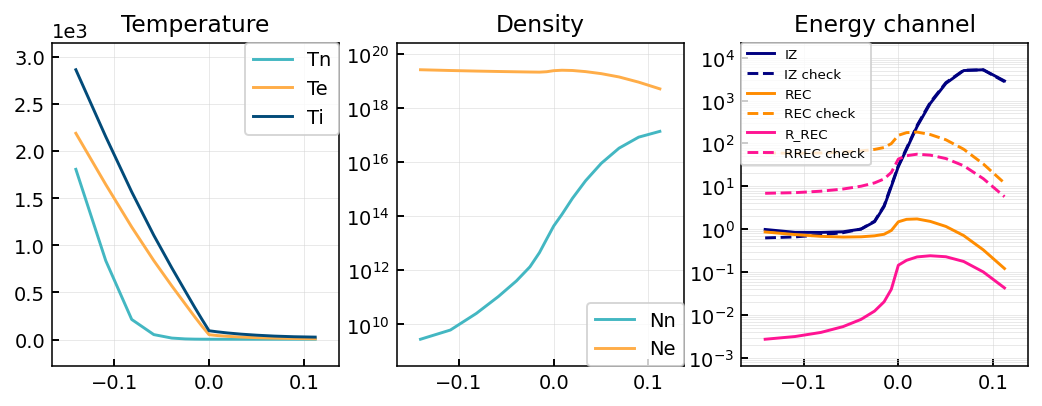

In [12]:
# ds = cs["fixfloorbase_addrec"].ds.isel(t=-1)
if "t" in ds.dims:
    ds = ds.isel(t=-1)

reg = ds.isel(x = slice(2,-2), theta = 45)   # Radial slice above X-point
# reg = ds.hermesm.select_region("outer_midplane_a").isel(x=slice(2,-2))           # OMP

fig, axes = plt.subplots(1,3, figsize = (9,3))

x = reg["dr"].cumsum()
x -= x[ds.metadata["ixseps1"] - ds.metadata["MXG"]]

Te = reg["Te"].values
Ne = reg["Ne"].values

amj = AMJUEL()
Krec = amj.amjuel_2d("rec", Te, Ne, data = recrate)
Kiz = amj.amjuel_2d("rec", Te, Ne, data = izrate)
Rrec = amj.amjuel_2d("rec", Te, Ne, data = Rrecrate)

ax = axes[0]
ax.set_title("Temperature")
ax.plot(x, reg["Td"], label = "Tn")
ax.plot(x, reg["Te"], label = "Te")
ax.plot(x, reg["Td+"], label = "Ti")
ax.legend()

# ax = axes[0,1]
# ax.set_title("Density channel")
# ax.set_yscale("log")
# ax.plot(x, reg["Sdd+_iz"], c = "navy", label = "IZ")
# ax.plot(x, Kiz * reg["Ne"] * reg["Nd"], c = "navy", ls = "--", label = "IZ check")
# ax.plot(x, reg["Sd+_rec"]*-1, c = "darkorange", label = "REC")
# ax.plot(x, Krec * reg["Ne"]**2, c = "darkorange", ls = "--", label = "REC check")
# ax.legend()

ax = axes[1]
ax.set_title("Density")
ax.set_yscale("log")
ax.plot(x, reg["Nd"], label = "Nn")
ax.plot(x, reg["Ne"], label = "Ne")
ax.legend()

ax = axes[2]
ax.set_title("Energy channel")
ax.set_yscale("log")
ax.plot(x, reg["Ed+_iz"], c = "navy", label = "IZ")
ax.plot(x, Kiz * reg["Ne"] * reg["Nd"] * reg["Td"] * (3/2) * constants("q_e"), c = "navy", ls = "--", label = "IZ check")
ax.plot(x, reg["Ed+_rec"]*-1, c = "darkorange", label = "REC")
ax.plot(x, Krec * reg["Ne"]**2 * reg["Td+"] * (3/2) * constants("q_e"), c = "darkorange", ls = "--", label = "REC check")
ax.plot(x, reg["Rd+_rec"]*-1 - reg["Sd+_rec"]*13.6*constants("q_e"), c = "deeppink", label = "R_REC")
ax.plot(x, Rrec * reg["Ne"]**2 * constants("q_e"), c = "deeppink", ls = "--", label = "RREC check")
ax.legend(fontsize = "x-small")

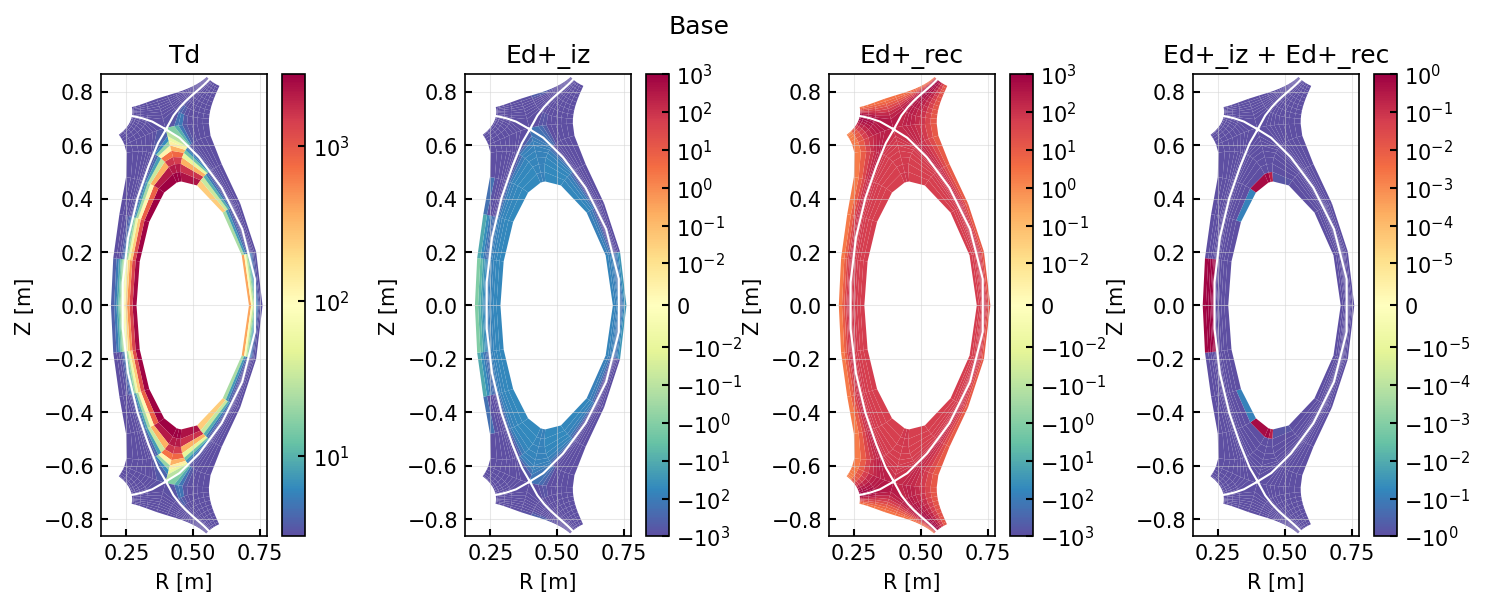

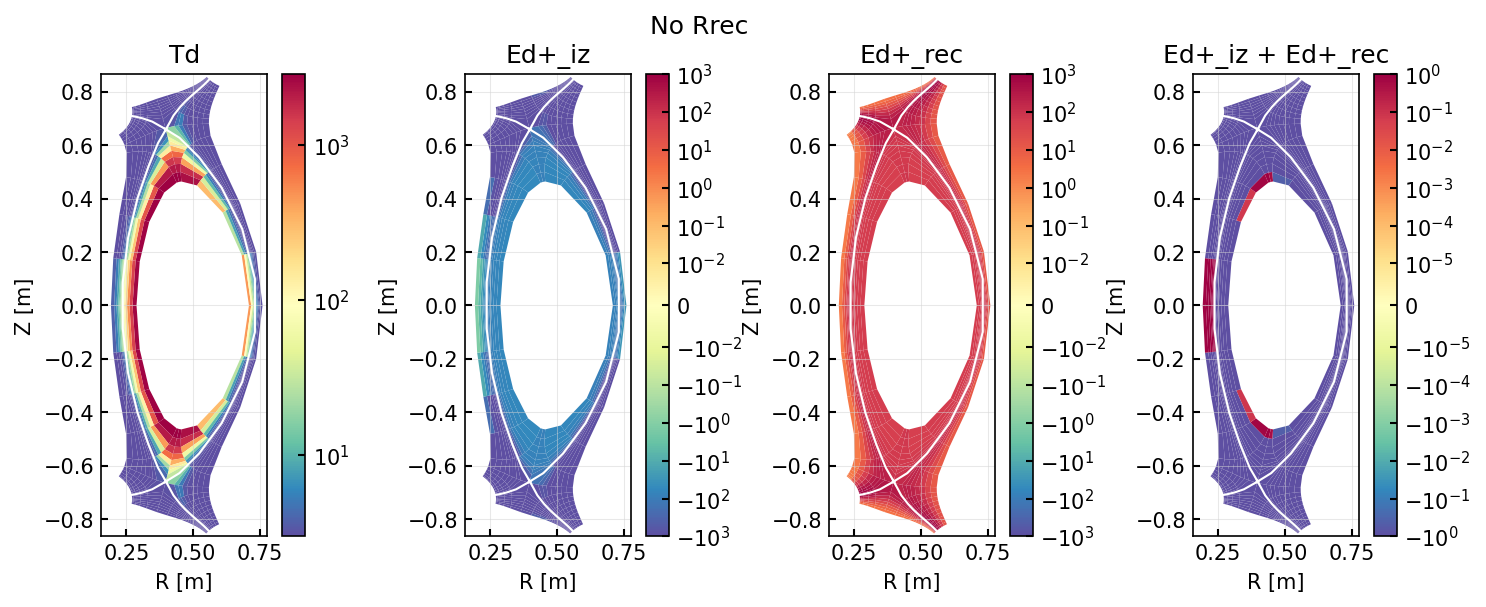

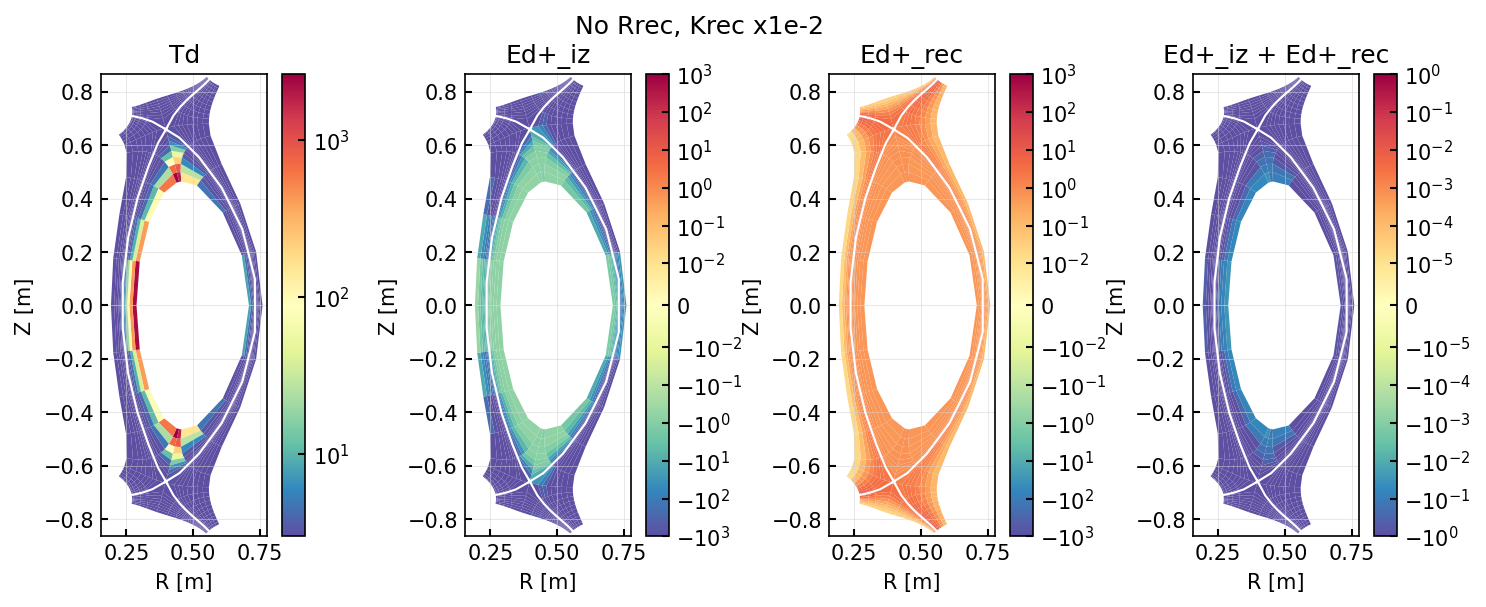

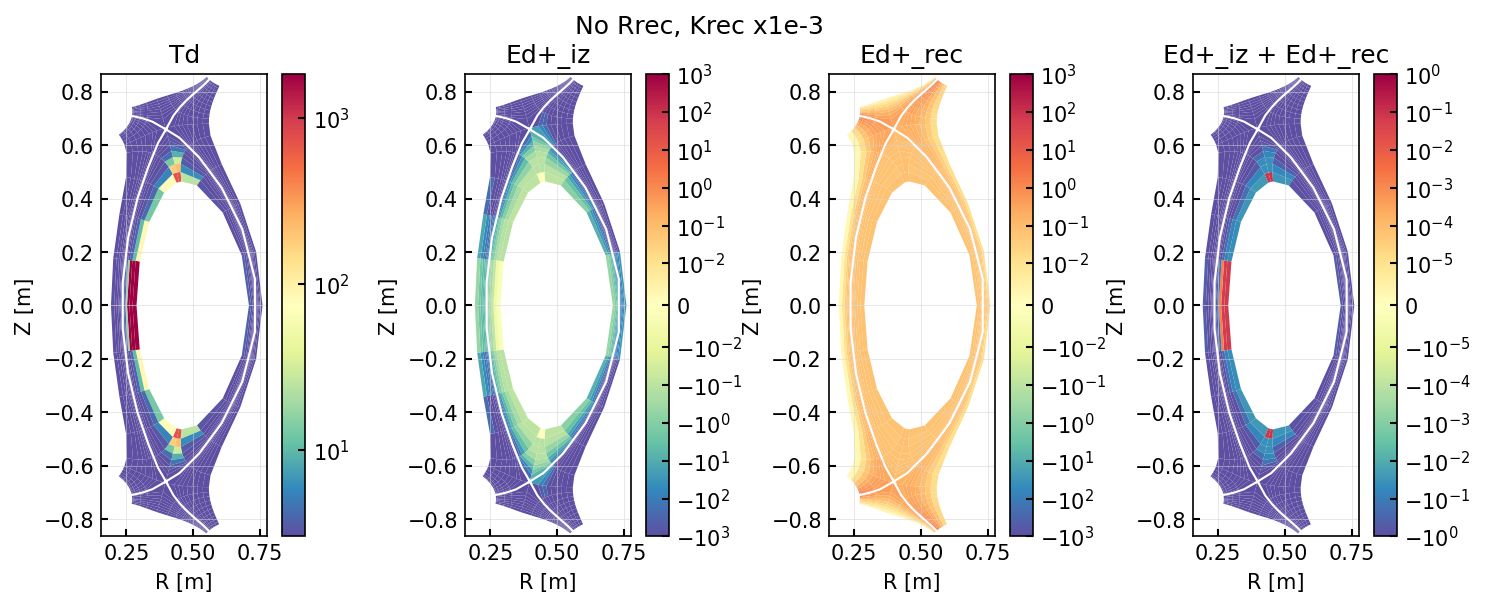

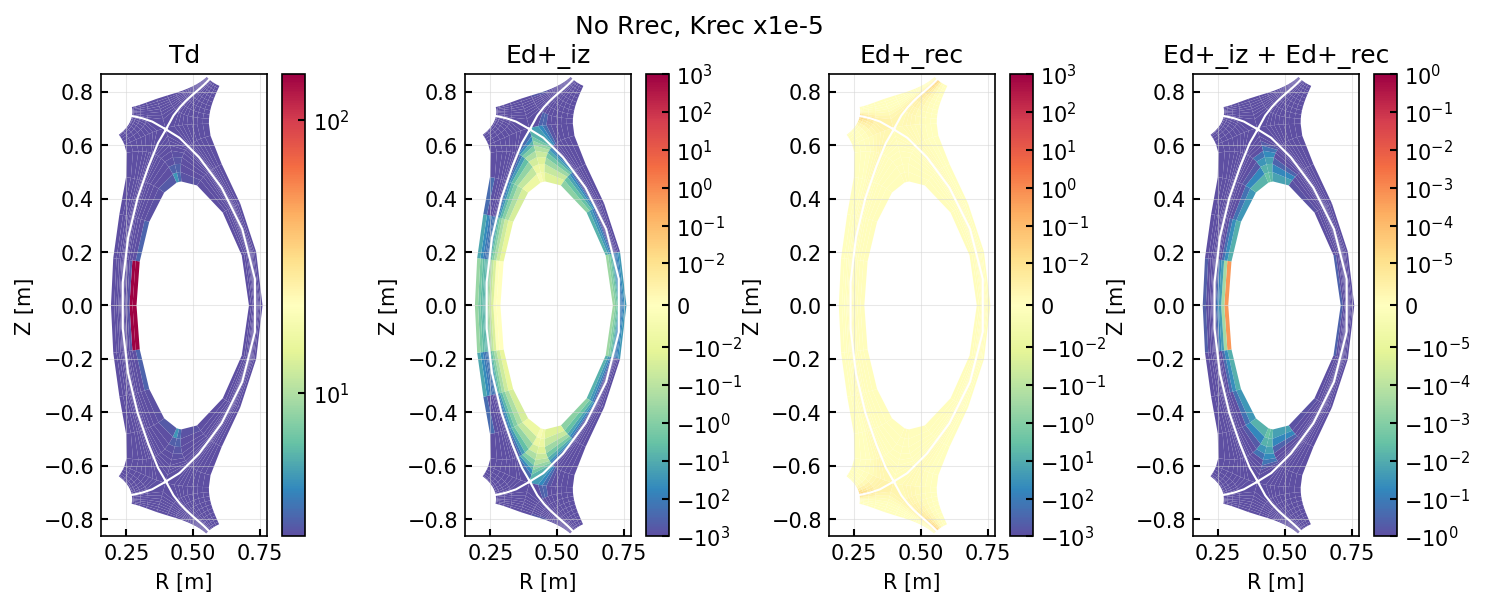

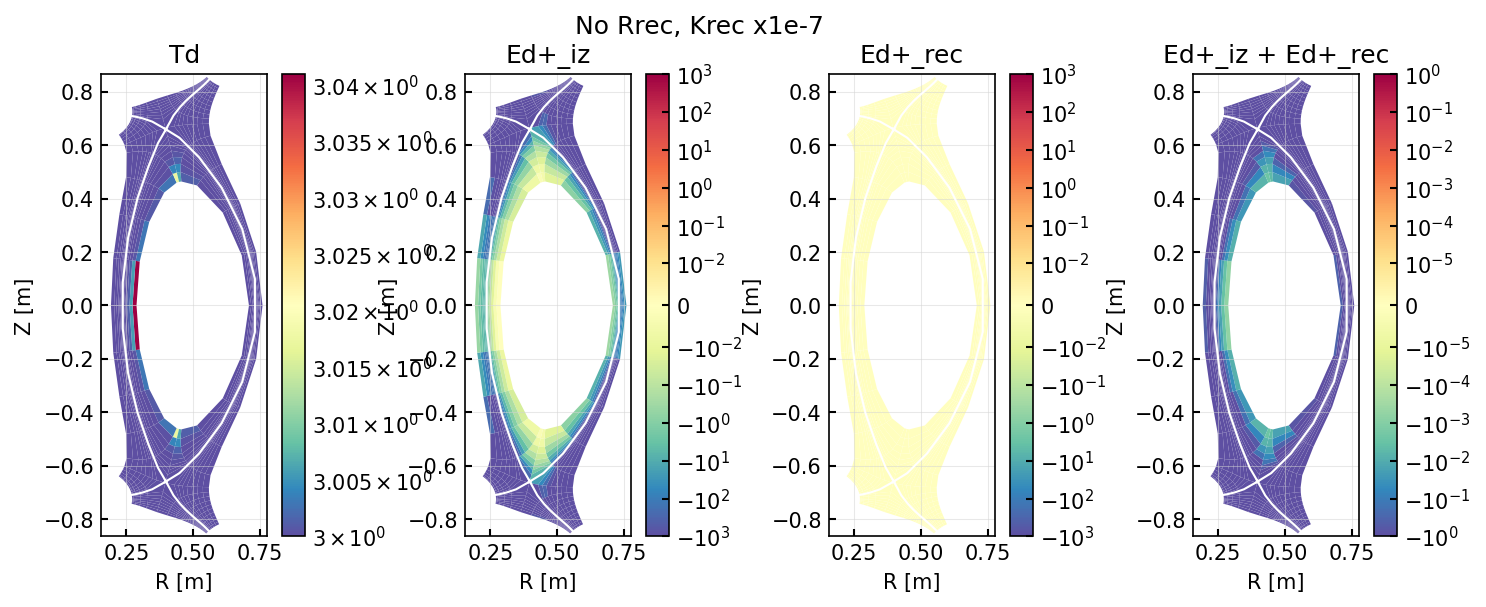

In [6]:
for name in cs:

    ds = cs[name].ds.isel(t=-1)

    # dSrcTot = ds["Ed_wall_refl"] + ds["Edd*_wall_refl"] + ds["Edd+_cxt"] + ds["Edd+_iz"]*-1 + ds["Ed+_rec"] * -1
    dSrcTot = ds["Ed+_iz"]*-1 + ds["Ed+_rec"] * -1
    sepkwargs = dict(color = "white", linestyle = "solid", linewidth = 1)

    fig, axes = plt.subplots(1,4, dpi = 150, figsize = (12,4))

    lim = 1e3
    vmin = -lim
    vmax = lim

    (ds["Td"]).hermesm.clean_guards().bout.polygon(ax = axes[0], cmap = "Spectral_r", antialias = True, 
                                                                vmin = None, vmax = None, 
                                                                logscale = True, 
                                                                separatrix_kwargs = sepkwargs, targets = False)

    (ds["Ed+_iz"] * -1).hermesm.clean_guards().bout.polygon(ax = axes[1], cmap = "Spectral_r", antialias = True, 
                                                                vmin = vmin, vmax = vmax, 
                                                                logscale = True, 
                                                                separatrix_kwargs = sepkwargs, targets = False)

    (ds["Ed+_rec"] * -1).hermesm.clean_guards().bout.polygon(ax = axes[2], cmap = "Spectral_r", antialias = True, 
                                                                vmin = vmin, vmax = vmax, 
                                                                logscale = True, 
                                                                separatrix_kwargs = sepkwargs, targets = False)

    # (ds["Rd+_rec"] * -1).hermesm.clean_guards().bout.polygon(ax = axes[3], cmap = "Spectral_r", antialias = True, 
    #                                                             vmin = vmin, vmax = vmax, 
    #                                                             logscale = True, 
    #                                                             separatrix_kwargs = sepkwargs, targets = False)

    (ds["Ed+_iz"]*-1 + ds["Ed+_rec"] * -1).hermesm.clean_guards().bout.polygon(ax = axes[3], cmap = "Spectral_r", antialias = True, 
                                                                vmin = -1, vmax = 1, 
                                                                logscale = True, 
                                                                separatrix_kwargs = sepkwargs, targets = False)

    axes[3].set_title("Ed+_iz + Ed+_rec")

    fig.suptitle(name)

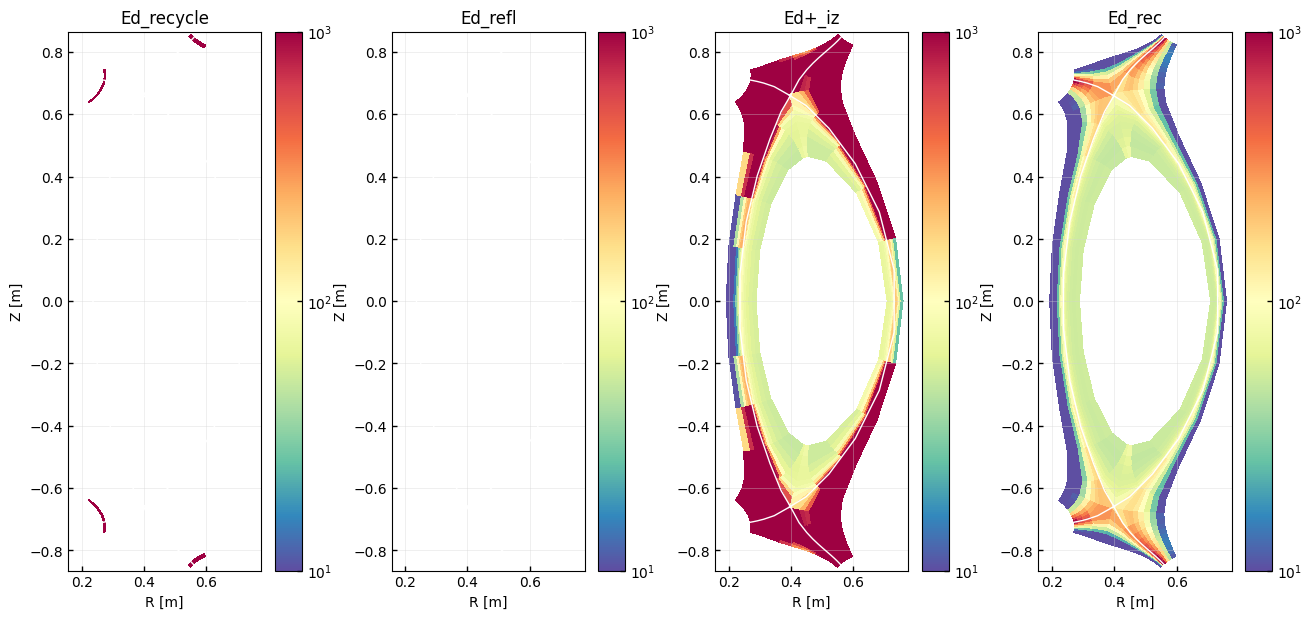

In [23]:
ds["Ed_recycle"] = ds["Ed_target_recycle"]
ds["Ed_refl"] = ds["Ed_target_refl"]
ds["Ed_iz"] = ds["Ed+_iz"] *-1
ds["Ed_rec"] = ds["Ed+_rec"] * -1

params = ["Ed_recycle", "Ed_refl",  "Ed+_iz", "Ed_rec"]

mins = []
maxes = []

for param in params:
    mins.append(np.nanmin(ds[param].hermesm.clean_guards().values))
    maxes.append(np.nanmax(ds[param].hermesm.clean_guards().values))
    
min = np.nanmin(mins)
max = np.nanmax(maxes)

min = 1e1
max = 1e3

fig, axes = plt.subplots(1, len(params), figsize = (4*len(params), 7), dpi = 100)

for i, param in enumerate(params):
    ds[param].hermesm.clean_guards().bout.polygon(ax = axes[i], 
                                                  vmin = min, vmax = max, 
                                                  logscale = True,
                                                  cmap = "Spectral_r", separatrix_kwargs = sepkwargs, targets = False)
    

# dSrcTot = ds["Ed_wall_refl"] + ds["Edd*_wall_refl"] + ds["Edd+_cxt"] + ds["Edd+_iz"]*-1 + ds["Ed+_rec"] * -1

# Field line histories

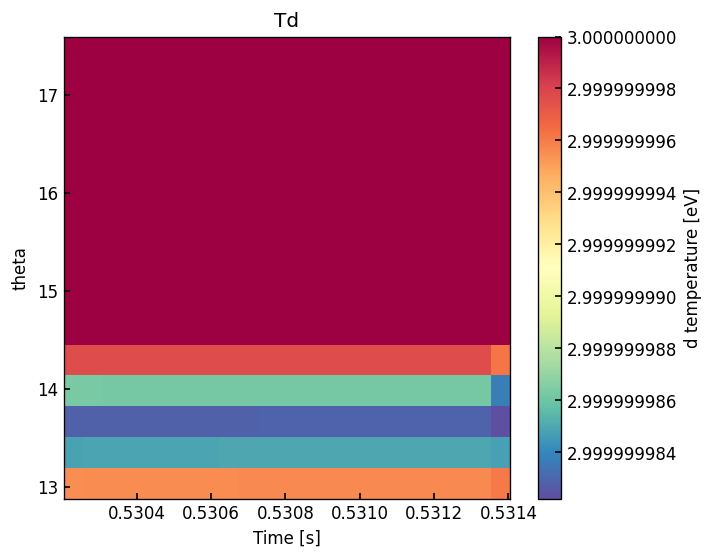

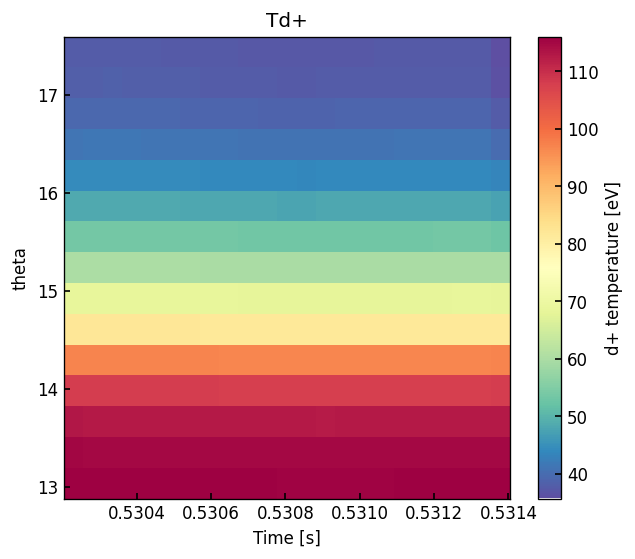

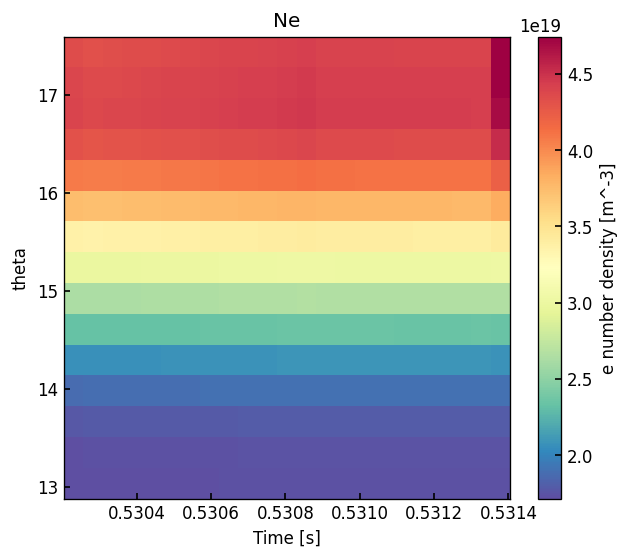

In [5]:

m = ds.metadata
fl = ds.isel(x = m["ixseps1"], theta = slice(41,-2))

for param in ["Td", "Td+", "Ne"]:
    fl[param].plot(cmap = "Spectral_r", linewidth = 0.0, color = "k", x = "t")
    plt.grid(False)
    plt.title(param)
    plt.show()

# Core history

In [14]:
cs.keys()

dict_keys(['no_r_rec_Krec_x0.01'])

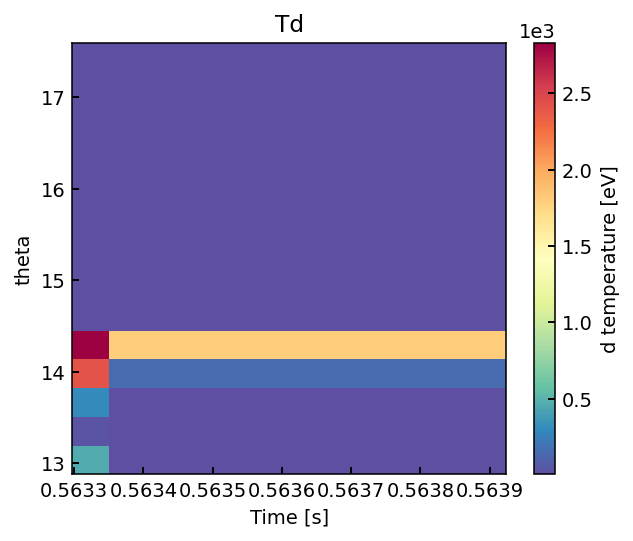

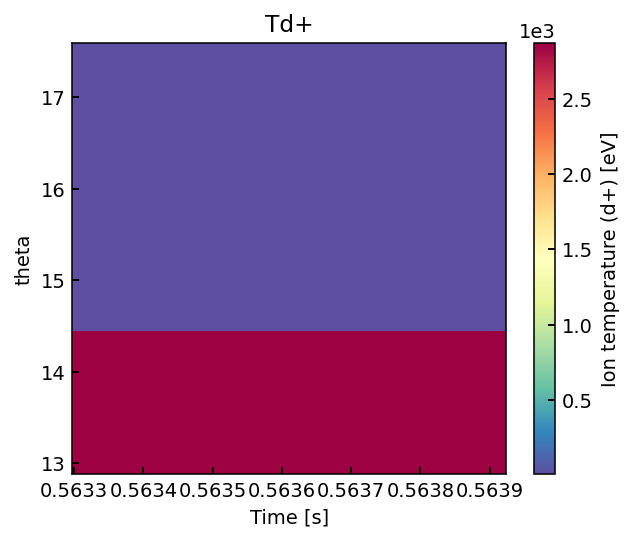

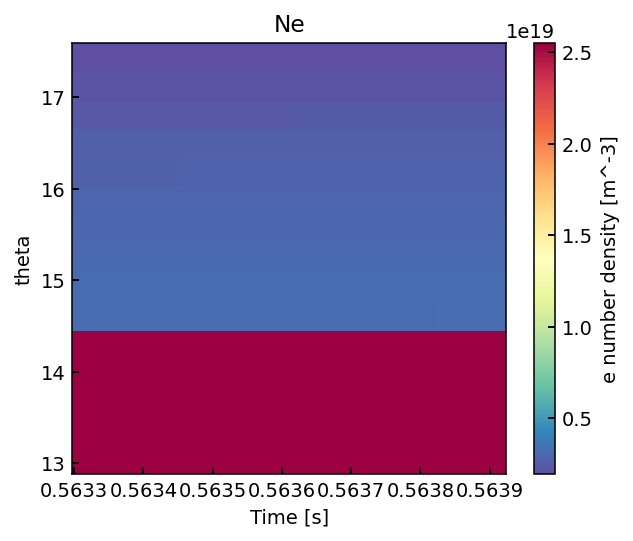

In [15]:
ds = cs['no_r_rec_Krec_x0.01'].ds
m = ds.metadata
fl = ds.isel(x = 2, theta = slice(41,-2))

for param in ["Td", "Td+", "Ne"]:
    fl[param].plot(cmap = "Spectral_r", linewidth = 0.0, color = "k", x = "t")
    plt.grid(False)
    plt.title(param)
    plt.show()

In [9]:
ds = cs["nopump_nocond"].ds
m = ds.metadata
fl = ds.isel(x = m["ixseps1"], theta = slice(41,-2))
fl["Ne"].plot(cmap = "Spectral_r", linewidth = 0.02, color = "k", x = "t")
plt.grid(False)

'x'

In [4]:
ds = calculate_radial_fluxes(ds)
ds = calculate_target_fluxes(ds)

NameError: name 'ds' is not defined

## Core parameters

### Core loop

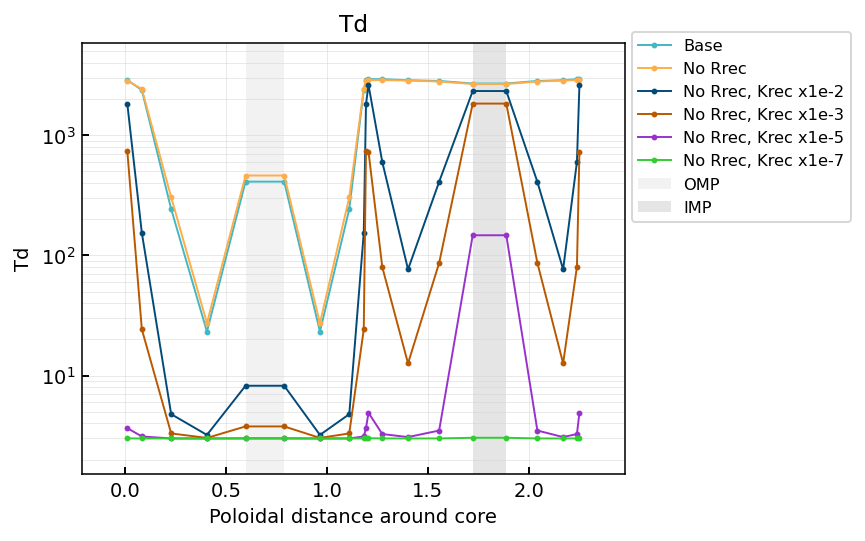

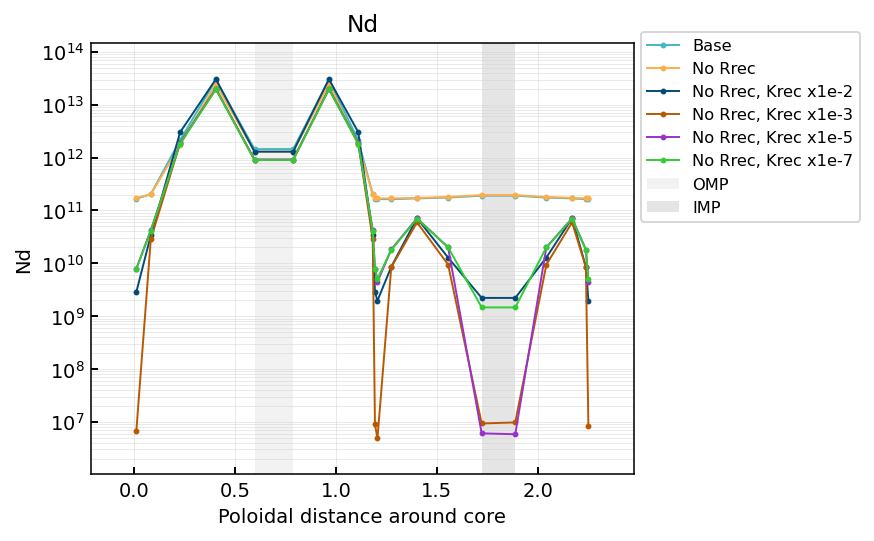

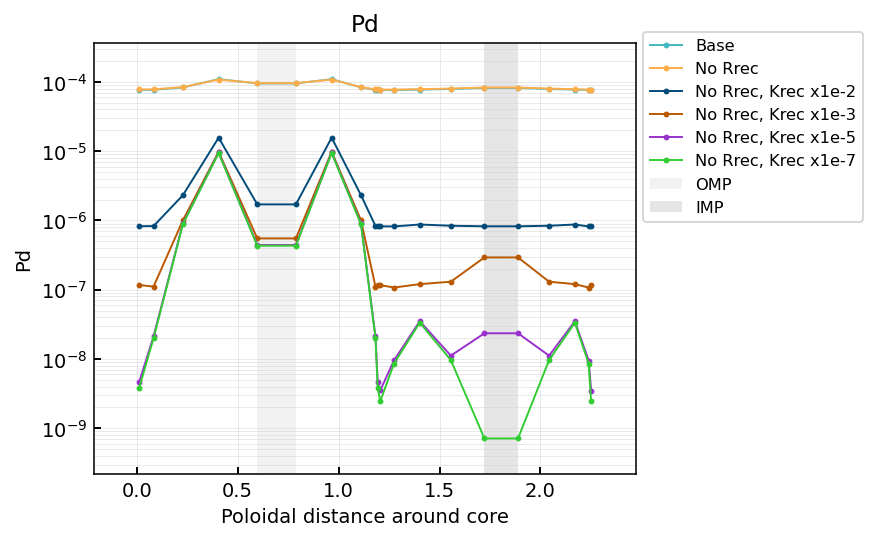

In [59]:
for param in ["Td", "Nd", "Pd"]:

    fig, ax = plt.subplots()
    m = ds.metadata
    ompA = int((m["j2_2g"] - m["j1_2g"]) / 2) + m["j1_2g"]
    ompB = int((m["j2_2g"] - m["j1_2g"]) / 2) + m["j1_2g"] + 1

    impA = int((m["j2_1g"] - m["j1_1g"]) / 2) + m["j1_1g"] + 1
    impB = int((m["j2_1g"] - m["j1_1g"]) / 2) + m["j1_1g"]


    for name in cs:
        ds = cs[name].ds.isel(t=-1)
        fl = ds.hermesm.select_region("core_edge").squeeze()
        x = fl["dl"].cumsum().values
        ax.plot(x, fl[param], label = name, marker = "o", lw = 1, ms = 2)

    indices = fl["theta_idx"].values
    indexmap = dict(zip(indices, x))
    ax.set_yscale("log")
    ylim = ax.get_ylim()
    ax.fill_betweenx([ylim[0], ylim[1]], indexmap[ompA], indexmap[ompB], color = "grey", alpha = 0.1, label = "OMP", linewidth = 0)
    ax.fill_betweenx([ylim[0], ylim[1]], indexmap[impA], indexmap[impB], color = "black", alpha = 0.1, label = "IMP", linewidth = 0)
    ax.set_ylim(ylim)
    fig.legend(bbox_to_anchor = (0.91,0.9), loc = "upper left", fontsize = "small")
    ax.set_xlabel("Poloidal distance around core")
    ax.set_ylabel(param)
    ax.set_title(param)

*****************************
Excel saves precision as it appears, not as what the number has.......
*****************************


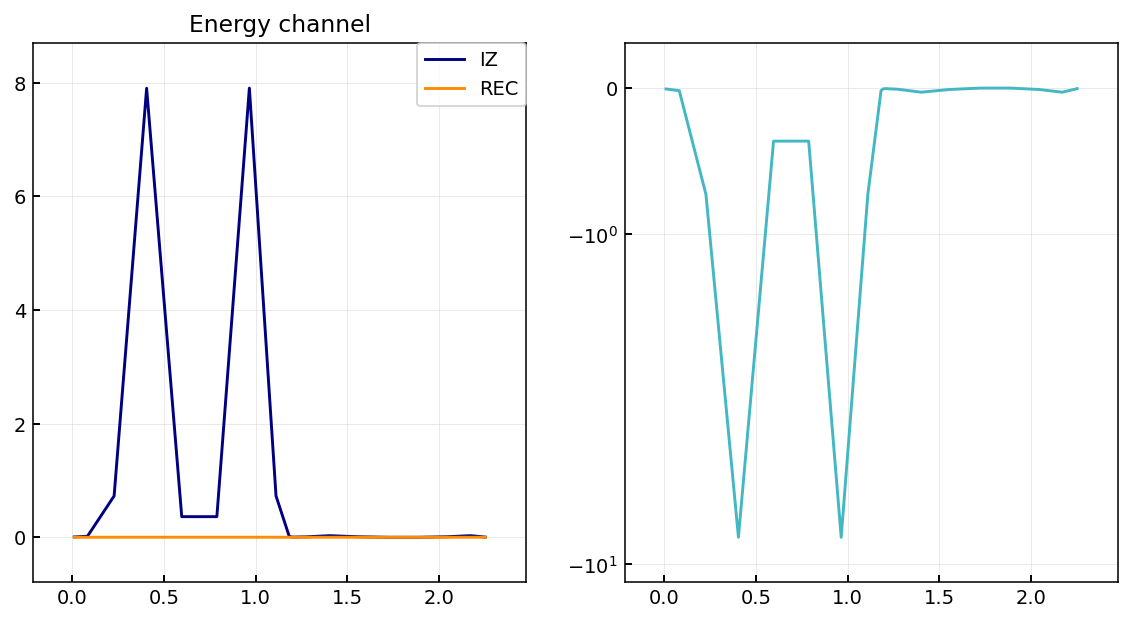

In [57]:
from general.rates import AMJUEL_rates
from sd1d.analysis import AMJUEL

reg = ds.hermesm.select_region("core_edge").squeeze()

Te = reg["Te"].values
Ne = reg["Ne"].values

amj = AMJUEL()
Krec = amj.amjuel_2d("rec", Te, Ne, data = AMJUEL_rates("rec"))
Kiz = amj.amjuel_2d("rec", Te, Ne, data = AMJUEL_rates("iz"))
Rrec = amj.amjuel_2d("rec", Te, Ne, data = AMJUEL_rates("Rrec"))

fig, axes = plt.subplots(1,2, figsize = (10,5))

x = reg["dl"].cumsum()

ax = axes[0]
ax.set_title("Energy channel")
# ax.set_yscale("log")
ax.plot(x, reg["Ed+_iz"], c = "navy", label = "IZ")
# ax.plot(x, Kiz * reg["Ne"] * reg["Nd"] * reg["Td"] * (3/2) * constants("q_e"), c = "navy", ls = "--", label = "IZ check")
ax.plot(x, reg["Ed+_rec"]*-1, c = "darkorange", label = "REC")
# ax.plot(x, Krec * reg["Ne"]**2 * reg["Td+"] * (3/2) * constants("q_e"), c = "darkorange", ls = "--", label = "REC check")
# ax.plot(x, reg["Rd+_rec"]*-1 - reg["Sd+_rec"]*13.6*constants("q_e"), c = "deeppink", label = "R_REC")
# ax.plot(x, Rrec * reg["Ne"]**2 * constants("q_e"), c = "deeppink", ls = "--", label = "RREC check")
ax.legend()
# ax2 = ax.twinx()
# ax2.plot(x, reg["Td"], alpha = 0.2, lw = 3, c = "red")

ax = axes[1]
# ax.set_title
ax.plot(x, reg["Ed+_iz"]*-1 + reg["Ed+_rec"]*-1)


In [29]:
indexmap[ompA]

0.5968016774462128

In [27]:
indexmap

{36: 0.011062846181905188,
 37: 0.08289381426894683,
 38: 0.22820279301739743,
 39: 0.40537352172772834,
 40: 0.5968016774462128,
 41: 0.7882298331645806,
 42: 0.9654005618749504,
 43: 1.1107095406234209,
 44: 1.1825405087106169,
 45: 1.193603354892308,
 7: 1.2059609402571945,
 8: 1.2743713464437998,
 9: 1.401895071566886,
 10: 1.5560182658300867,
 11: 1.722391288512712,
 12: 1.8887643111953767,
 13: 2.042887505458503,
 14: 2.170411230581757,
 15: 2.2388216367682956,
 16: 2.251179222133122}

In [26]:
x[indexmap[ompA]]

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

### OMP

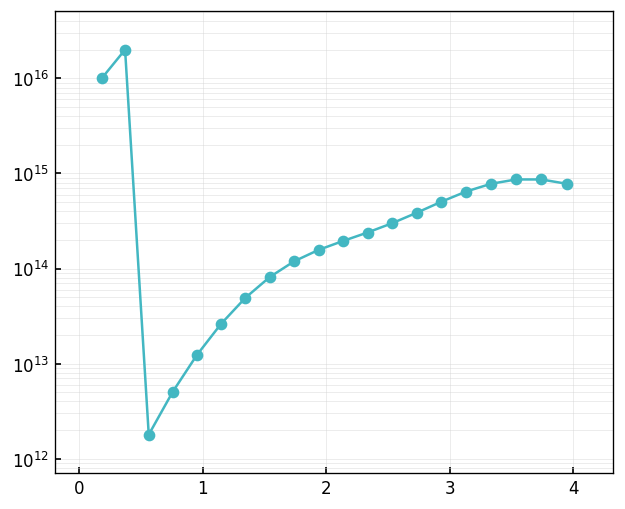

In [6]:
ds = cs["newalldisabled_flushnn"].ds.isel(t=-1)
fl = ds.hermesm.select_region("outer_midplane_a").squeeze()

fig, ax = plt.subplots()

x = fl["dl"].cumsum()

ax.plot(x, fl["Nd"], marker = "o")

ax.set_yscale("log")

# ax2 = ax.twinx()
# (fl["Pd"] / (1e17 * 1200 * constants("q_e"))).plot(ax = ax2, c = "r")
# ax2.set_yscale("log")



# State of Td

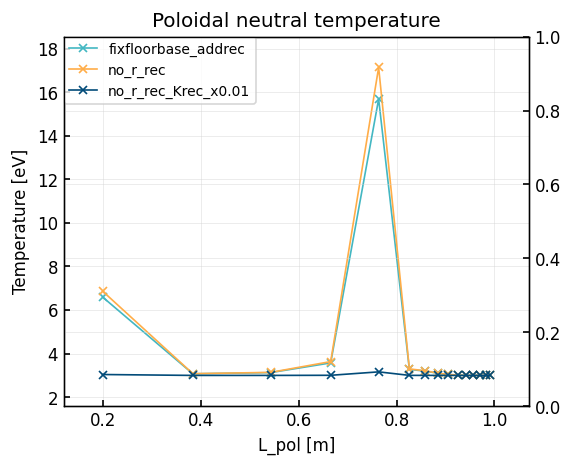

In [26]:

# colors = mpl.cm.get_cmap("plasma", len(cases))(range(len(cases)))
fig, ax = plt.subplots(dpi = 120)

cases = cs.keys()

ax2 = ax.twinx()

# colors = ["teal", "darkorange", "firebrick"]

for i, case in enumerate(cases):
    ds = cs[case].ds.isel(t=-1)
    m = ds.metadata
    fl = ds.isel(x = m["ixseps1"], theta = slice(41,-2))
    dist = np.cumsum(fl["dl"])
    
    if any([x in case for x in ["form2", "form4"]]):
        marker = "x"
    elif any([x in case for x in ["form1", "form3"]]):
        marker = "+"
    else:
        marker = "x"
    ax.plot(dist, fl["Td"], label = case, marker = marker, ms = 5, lw = 1, 
            # color = colors[i]
            )
    
    # try:
    # try:
    #     ax2.plot(dist, fl["Sd+_rec"], label = case, marker = marker, ms = 5, lw = 1)
    # except:
    #     pass
                # color = colors[i])
# ax.plot(dist, fl["Td+"],  marker = "o", ms = 5, lw = 0.5, c = colors[i])
# ax.set_yscale("symlog", linthresh = 1e-3)
ax.set_xlabel("L_pol [m]")
ax.set_ylabel("Temperature [eV]")
ax.set_title("Poloidal neutral temperature")
ax.legend(fontsize="small")
# ax.set_ylim(0,200)

In [6]:
%matplotlib widget


In [ ]:
plt.close("all")
fig, ax = plt.subplots()
ax.set_ylim(-0.85, 0.2)
ax.set_xlim(0.15,0.75)
ds = cs["addrec"].ds
xbout.plotting.animate.animate_poloidal(ds["Td"].hermesm.clean_guards(), ax = ax, 
                                        cmap = "Spectral_r",
                                        linewidth = 0.1,
                                        logscale = True)
                                        
                                        

In [11]:
plt.close("all")
%matplotlib inline

In [20]:
50 * 1.2

60.0

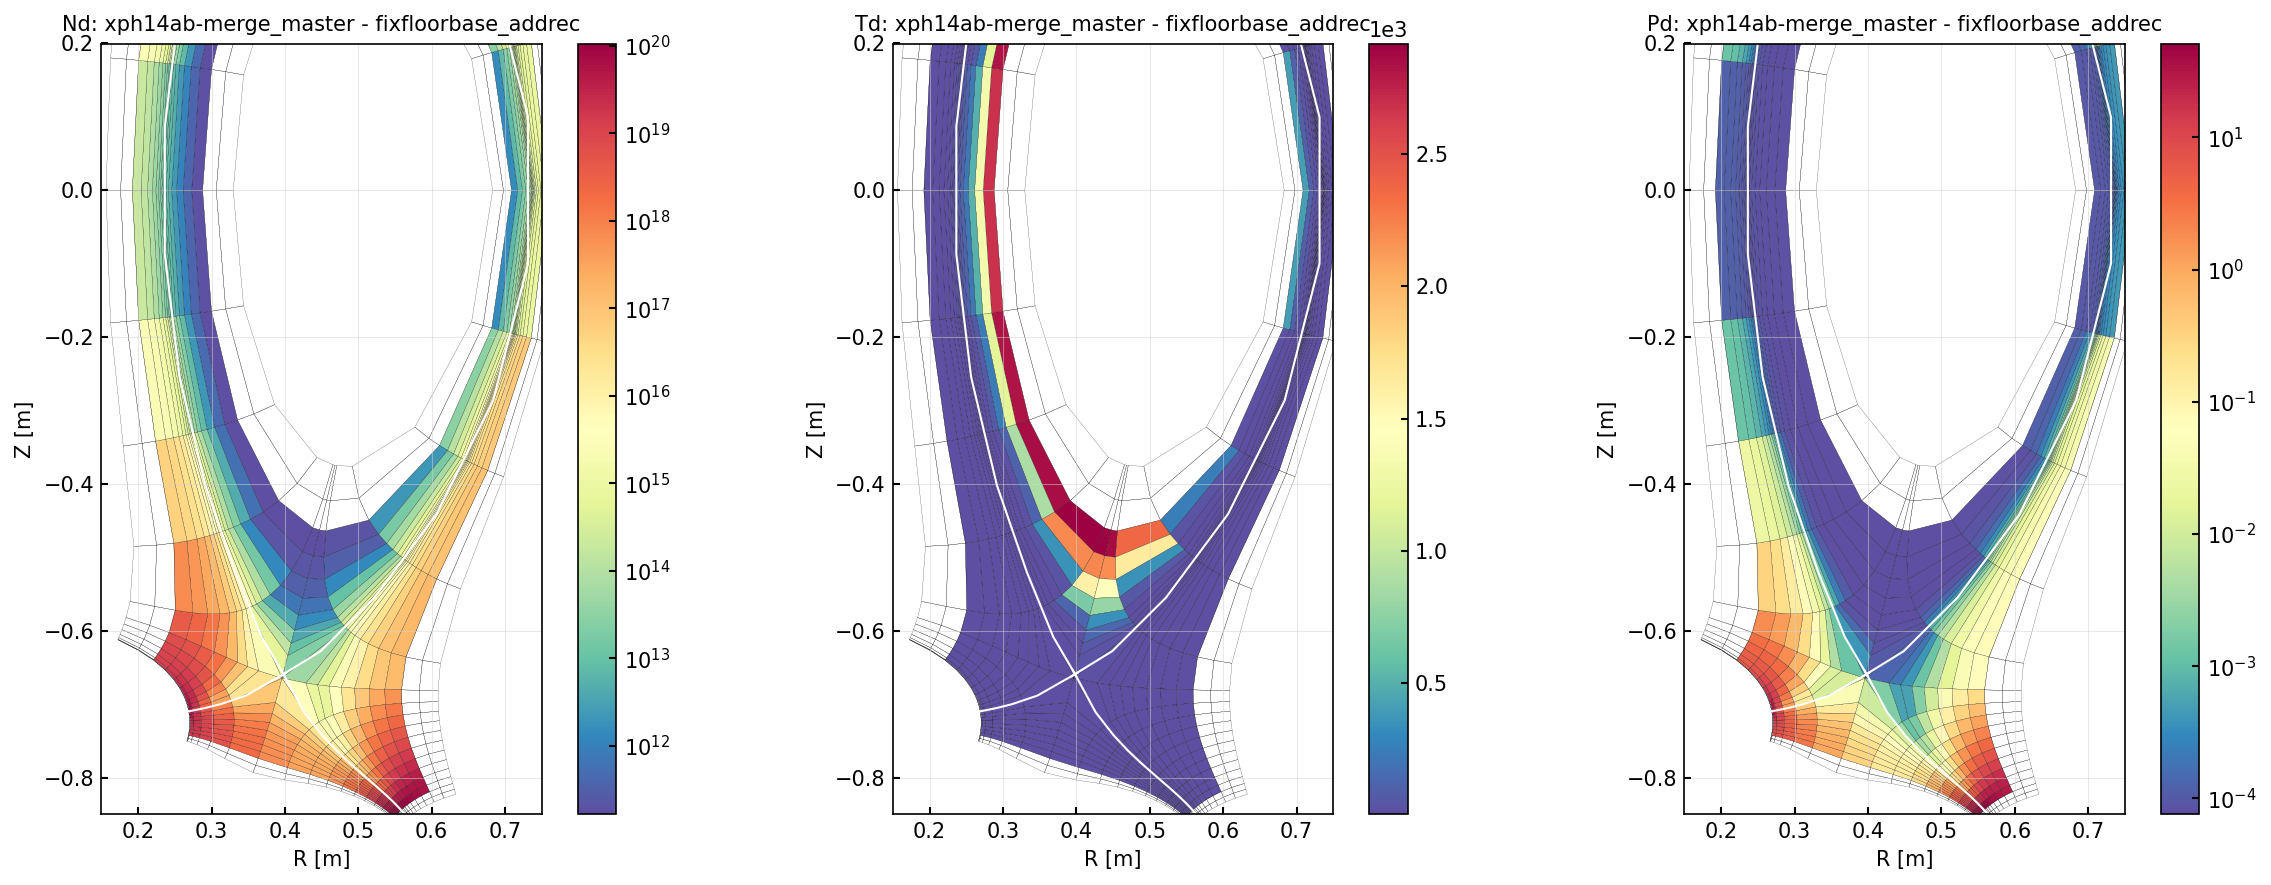

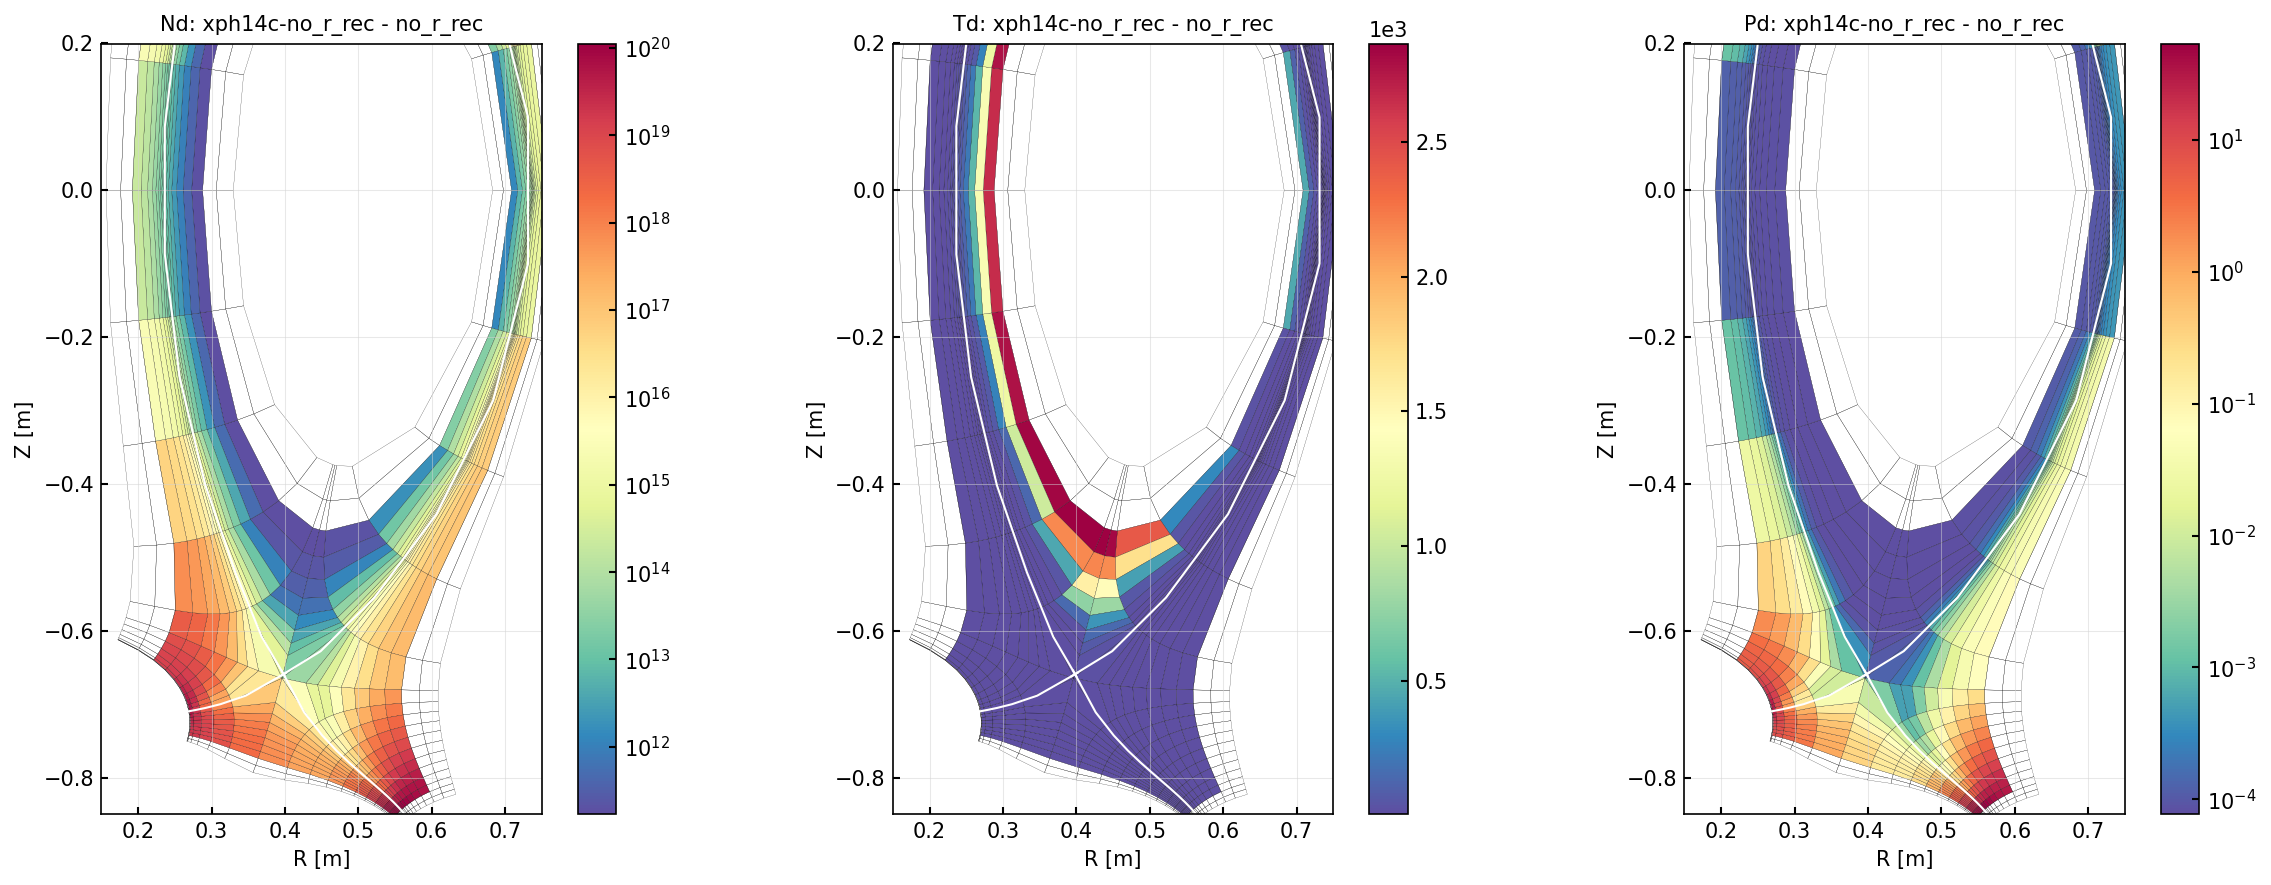

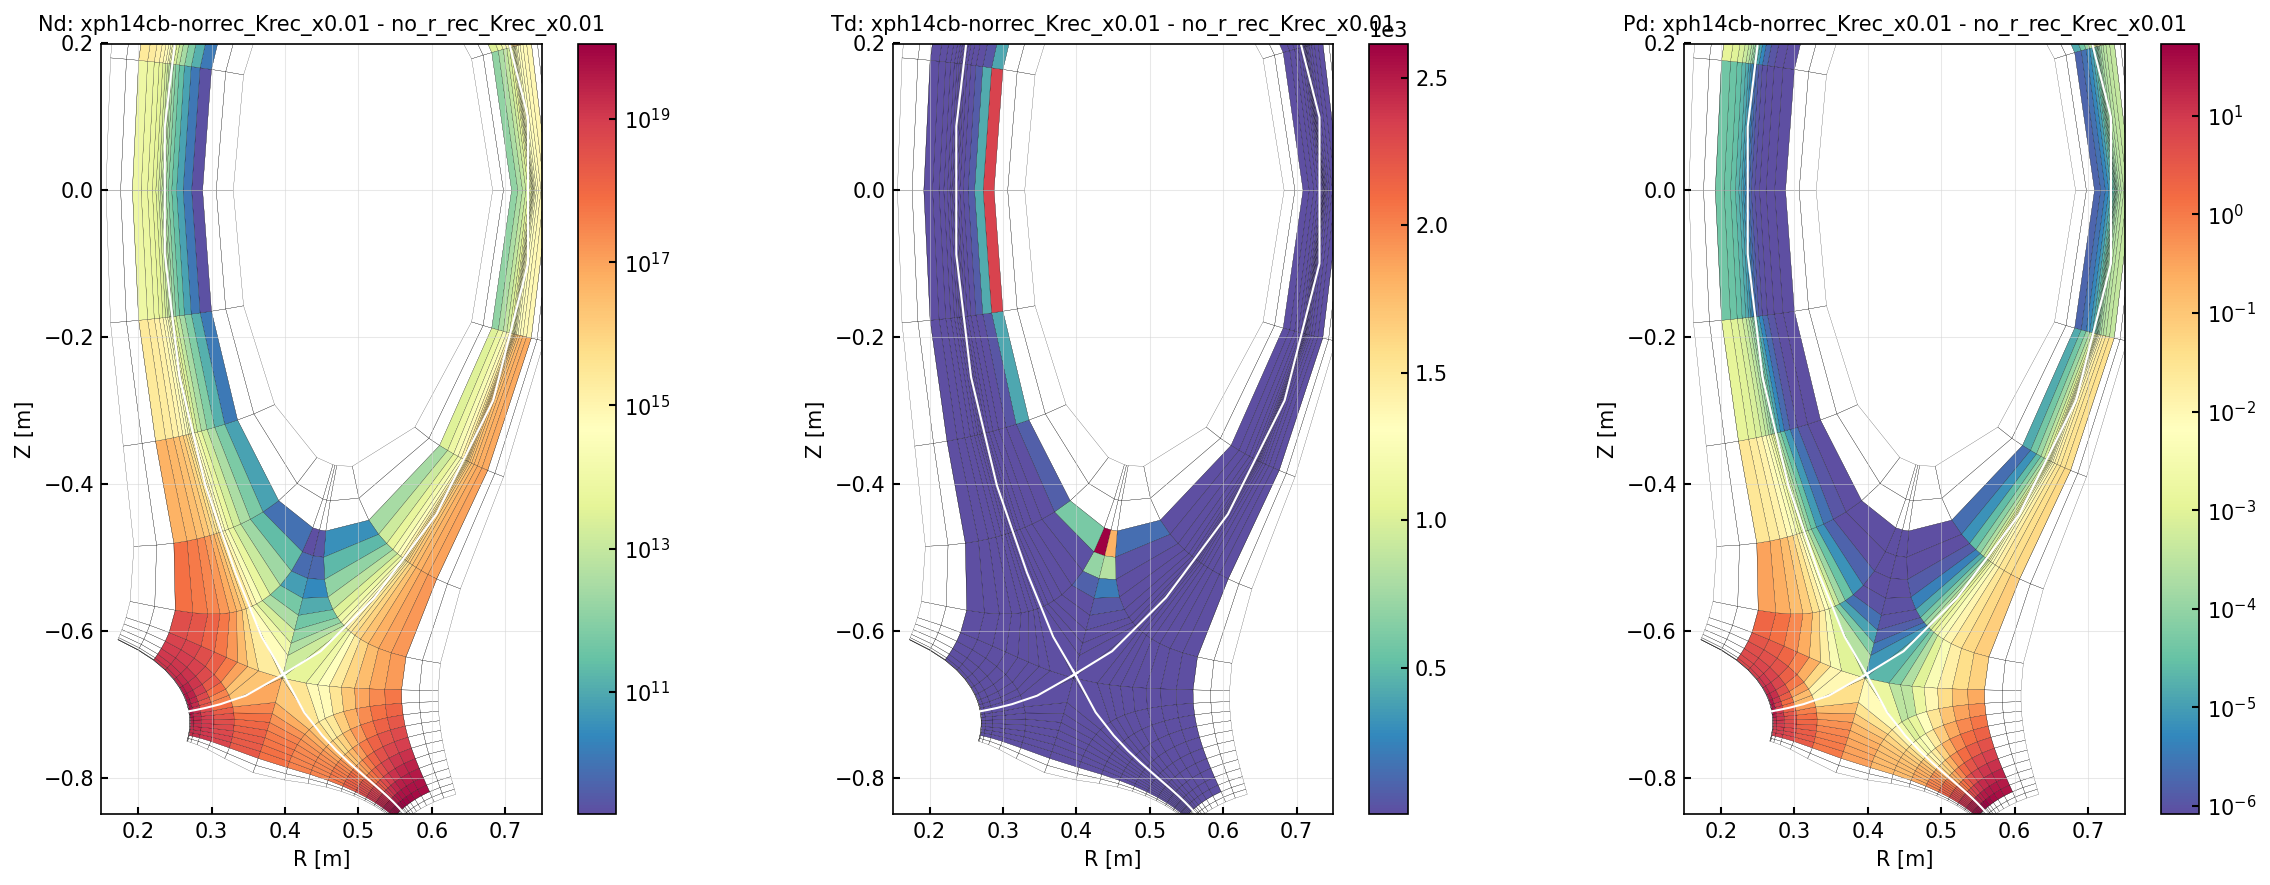

In [25]:
clean_guards = True

for entry in toload:
    case = entry["name"]
    fig, axes = plt.subplots(1,3, figsize = (16,6), dpi = 150)
    newds = cs[case].ds.isel(t=-1)
    
    ax = axes[0]
    data = (newds["Nd"])
    if clean_guards:
        data = data.hermesm.clean_guards()
    data.bout.polygon(ax, cmap = "Spectral_r", 
                                        # vmax = 25, vmin = 300, 
                                        antialias = True, linewidth = 0.1, logscale = True,
                                                            separatrix_kwargs = sepkwargs, targets = False)
    ax.set_ylim(-0.85, 0.2)
    ax.set_xlim(0.15,0.75)
    ax.set_title(f"Nd: {entry['id']} - {entry['name']}", fontsize = "medium")
    
    
    ax = axes[1]
    data = (newds["Td"])
    if clean_guards:
        data = data.hermesm.clean_guards()
    data.bout.polygon(ax, cmap = "Spectral_r", 
                                        # vmax = 25, vmin = 300, 
                                        antialias = True, linewidth = 0.1, logscale = False,

                                                            separatrix_kwargs = sepkwargs, targets = False)
    ax.set_ylim(-0.85, 0.2)
    ax.set_xlim(0.15,0.75)
    ax.set_title(f"Td: {entry['id']} - {entry['name']}", fontsize = "medium")
    
    
    ax = axes[2]
    data = (newds["Pd"])
    if clean_guards:
        data = data.hermesm.clean_guards()
    data.bout.polygon(ax, cmap = "Spectral_r", 
                                        # vmax = 25, vmin = 300, 
                                        antialias = True, linewidth = 0.1, logscale = True,
                                                            separatrix_kwargs = sepkwargs, targets = False)
    ax.set_ylim(-0.85, 0.2)
    ax.set_xlim(0.15,0.75)
    ax.set_title(f"Pd: {entry['id']} - {entry['name']}", fontsize = "medium")
    
    fig.tight_layout()


In [22]:
cs.keys()

dict_keys(['newalldisabled_lopnfloor'])

In [31]:
def get_floors(ds):
    o = ds.options["d"]
    
    if "nn_floor" in o.keys():
        nn_floor = o["nn_floor"]
    else:
        nn_floor = 1e-5
    
    if "pn_floor" in o.keys():
        pn_floor = o["pn_floor"]
    else:
        pn_floor = 1e-5
        
    Nnorm = ds.metadata["Nnorm"]
    Tnorm = ds.metadata["Tnorm"]
    Pnorm = Nnorm * Tnorm * constants("q_e")
        
    nn_floor_si = nn_floor * Nnorm
    pn_floor_si = nn_floor * Pnorm
        
    return {"nn_floor" : nn_floor, "pn_floor" : pn_floor, "nn_floor_si" : nn_floor_si, "pn_floor_si" : pn_floor_si}    
    
floors = get_floors(ds)
nn_floor = floors["nn_floor"]
pn_floor = floors["pn_floor"]

In [26]:
ds.options["hermes"].keys()

['components',
 'Nnorm',
 'Bnorm',
 'Tnorm',
 'qe',
 'Mp',
 'Cs0',
 'Omega_ci',
 'rho_s0']

In [18]:
pn_min = (ds["Pd"]/ds["Pd"].attrs["conversion"]).hermesm.clean_guards().min(["x", "theta"]).values
print(pn_min)
print(floors["pn_floor"])

pn_min_si = (ds["Pd"]).hermesm.clean_guards().min(["x", "theta"]).values
print(pn_min_si)
print(floors["pn_floor_si"])

print(pn_min_si / pn_min)
print(floors["pn_floor_si"] / floors["pn_floor"])
print(ds.metadata["Nnorm"] * ds.metadata["Tnorm"] * constants("q_e"))

9.85949704116278e-10
1e-10
1.895598693881177e-08
1.9226119440000003e-07
19.226119607999998
1922.6119440000002
19.22611944


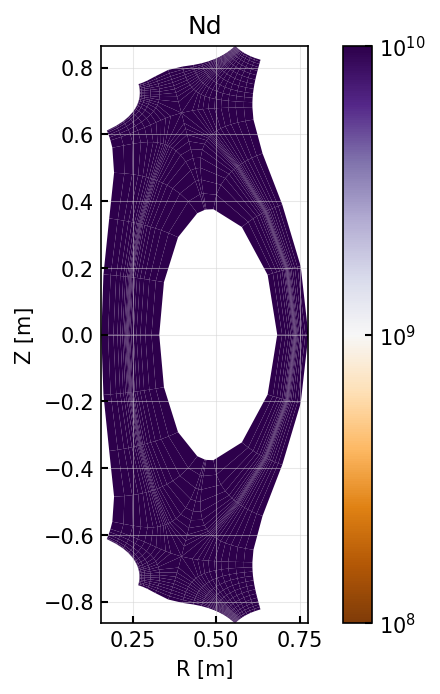

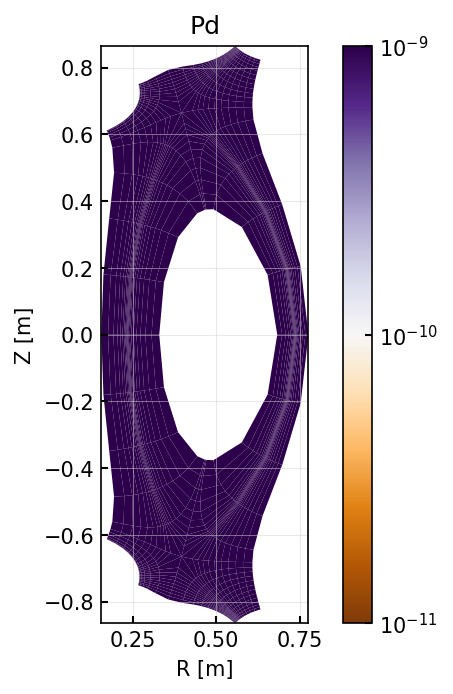

In [10]:
# ds = cs["newalldisabled_lopnfloor"].ds.isel(t=-1)
for case in cs:
    ds = cs[case].ds.isel(t=-1)
    # cmap = mpl.colors.LinearSegmentedColormap.from_list("custom", ["darkorange", "white", "navy"], N=3)
    cmap = "PuOr"

    floors = ds.hermesm.get_floors()
    nn_floor_si = floors["nn_floor_si"]
    pn_floor_si = floors["pn_floor_si"]

    fig, ax = plt.subplots(dpi = 150)
    (ds["Nd"]).bout.polygon(ax = ax, cmap = cmap, targets = False, 
                                                        separatrix_kwargs = dict(color="white", linestyle = "-", linewidth = 0),
                                                        antialias = True,
                                                        logscale = True,
                                                        vmin = nn_floor_si*1e-1,
                                                        vmax = nn_floor_si*1e1)
    # ax.set_ylim(-0.9, 0)

    fig, ax = plt.subplots(dpi = 150)
    data = ds["Pd"]/ds["Pd"].attrs["conversion"]
    data.bout.polygon(ax = ax, cmap = cmap, targets = False, 
                                                        separatrix_kwargs = dict(color="white", linestyle = "-", linewidth = 0),
                                                        antialias = True,
                                                        logscale = True,
                                                        vmin = floors["pn_floor"]*1e-1,
                                                        vmax = floors["pn_floor"]*1e1)
    # ax.set_ylim(-0.9, 0)

# Animate

In [16]:
cs.keys()

dict_keys(['newalldisabled_flushnn'])

In [8]:
%matplotlib widget

In [10]:
%matplotlib inline

(0.15, 0.75)

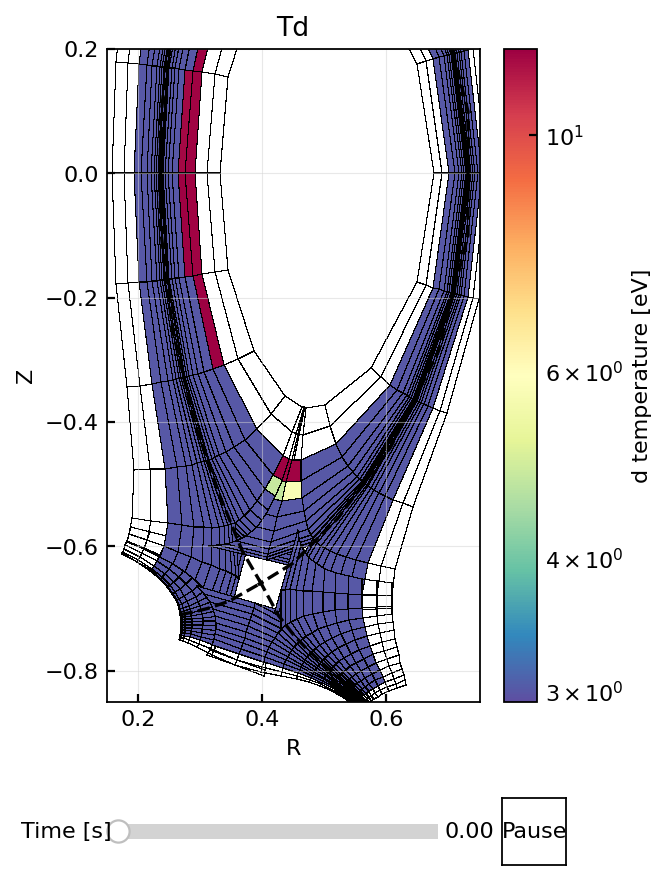

In [9]:
plt.close("all")
fig, ax = plt.subplots( figsize = (4,6), dpi = 160)
newds = cs["newalldisabled_flushnn"].ds

anim = xbout.plotting.animate.animate_poloidal(newds["Td"].hermesm.clean_guards(), ax = ax, targets = False, linewidth = 0.01, color = "k", logscale = True, cmap = "Spectral_r")
ax.set_ylim(-0.85, 0.2)
ax.set_xlim(0.15,0.75)

# History of max Tn, min Pn, min Nn

In [36]:
cs.keys()

dict_keys(['upwind1stord_lofloor'])

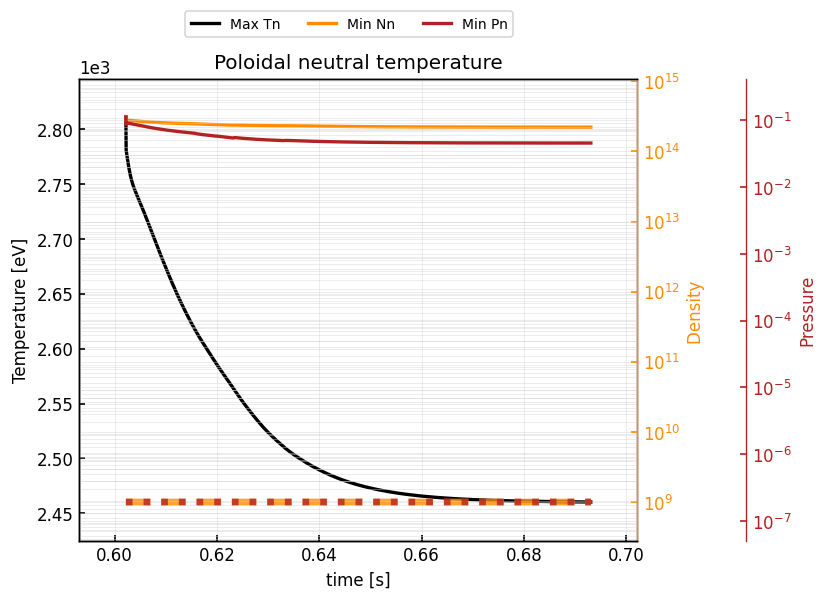

In [37]:

colors = ["teal", "darkorange", "firebrick", "navy", "limegreen", "purple", "skyblue", "red"]


# colors = mpl.cm.get_cmap("plasma", len(cases))(range(len(cases)))
fig, ax = plt.subplots(dpi = 120)

ds = cs["upwind1stord_lofloor"].ds
m = ds.metadata
floors = ds.hermesm.get_floors()

ax.plot(ds["t"], ds["Td"].hermesm.clean_guards().max(["x", "theta"]), label = "Max Tn", marker = "x", ms = 0, lw = 2, color = "k")

# ax.set_yscale("symlog", linthresh = 1e-3)
# ax.set_yscale("log")
ax.set_xlabel("time [s]")
ax.set_ylabel("Temperature [eV]")
ax.set_title("Poloidal neutral temperature")

ax2 = ax.twinx()
ax2color = "darkorange"
ax2.plot(ds["t"], ds["Nd"].hermesm.clean_guards().min(["x", "theta"]), label = "Min Nn", c = ax2color, marker = "x", ms = 0, lw = 2)
ax2.set_yscale("log")
# ax2.set_ylim(1e14,3e17)
ax2.set_ylabel("Density ", color = ax2color)
ax2.spines["right"].set_color(ax2color)
ax2.tick_params(axis = "y", colors = ax2color)
ax2.plot(ds["t"], np.ones_like(ds["t"])*floors["nn_floor_si"], c = ax2color, ls = "--", zorder = 100, lw = 4, alpha = 0.8)

ax3 = ax.twinx()
ax3color = "firebrick"
ax3.plot(ds["t"], ds["Pd"].hermesm.clean_guards().min(["x", "theta"]), label = "Min Pn", c = ax3color, marker = "x", ms = 0, lw = 2)
ax3.set_yscale("log")
# ax3.set_ylim(0.0001,10)
ax3.set_ylabel("Pressure", color = ax3color)
ax3.spines["right"].set_color(ax3color)
ax3.spines["right"].set_position(("outward", 65))
ax3.tick_params(axis = "y", colors = ax3color)
ax3.plot(ds["t"], np.ones_like(ds["t"])*floors["pn_floor_si"], c = ax3color, ls = ":", zorder = 100, lw = 4, alpha = 0.8)


fig.legend(loc = "lower center", bbox_to_anchor = (0.5, 0.95), ncols = 4, fontsize="small")
ax.grid(which = "minor", visible = False)
# ax.set_yscale("log")
# ax.set_ylim(10,10000)

In [45]:
floors

{'nn_floor': 1e-08,
 'pn_floor': 1e-10,
 'nn_floor_si': 1000000000.0,
 'pn_floor_si': 1.9226119440000003e-07}

In [48]:
ds["Pd"].hermesm.clean_guards().min(["x", "theta"]).values

array(1.89559869e-08)

In [49]:
(ds["Pd"]/ds["Pd"].attrs["conversion"]).hermesm.clean_guards().min(["x", "theta"]).values

array(9.85949704e-10)

In [52]:
ds.metadata["Nnorm"] * ds.metadata["Tnorm"] * constants("q_e")

19.22611944

In [53]:
ds.metadata["Pnorm"]

19.22611944

In [51]:
ds["Pd"].attrs["conversion"]

19.226119607999998

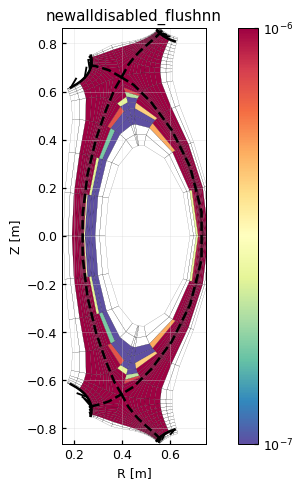

In [56]:


for name in cs:

    fig, ax = plt.subplots(figsize = (9,6), dpi = 90)
    ds = cs[name].ds.isel(t=-1)
    
    abs(ds["Pd"]).hermesm.clean_guards().bout.polygon(ax, cmap = "Spectral_r", 
                                        vmax = 1e-6, vmin = 1e-7, 
                                        antialias = True, linewidth = 0.1, logscale = True)

    # ax.set_ylim(-0.85, 0.2)
    ax.set_xlim(0.15,0.75)
    ax.set_title(name)


## Compare to base

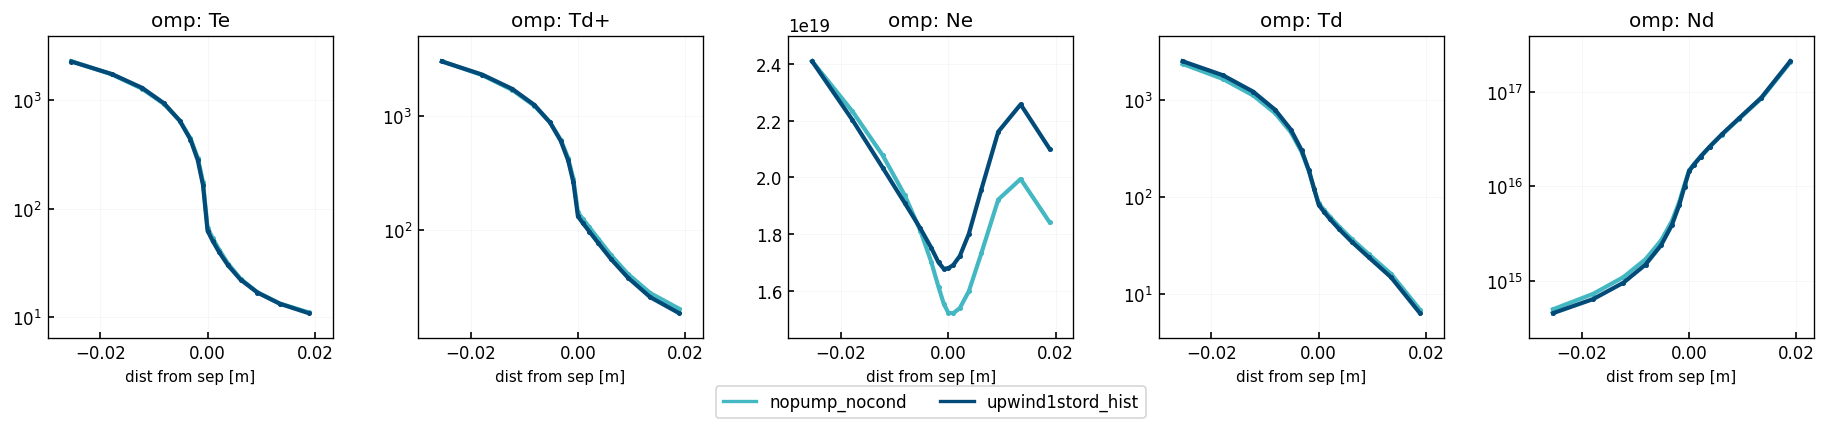

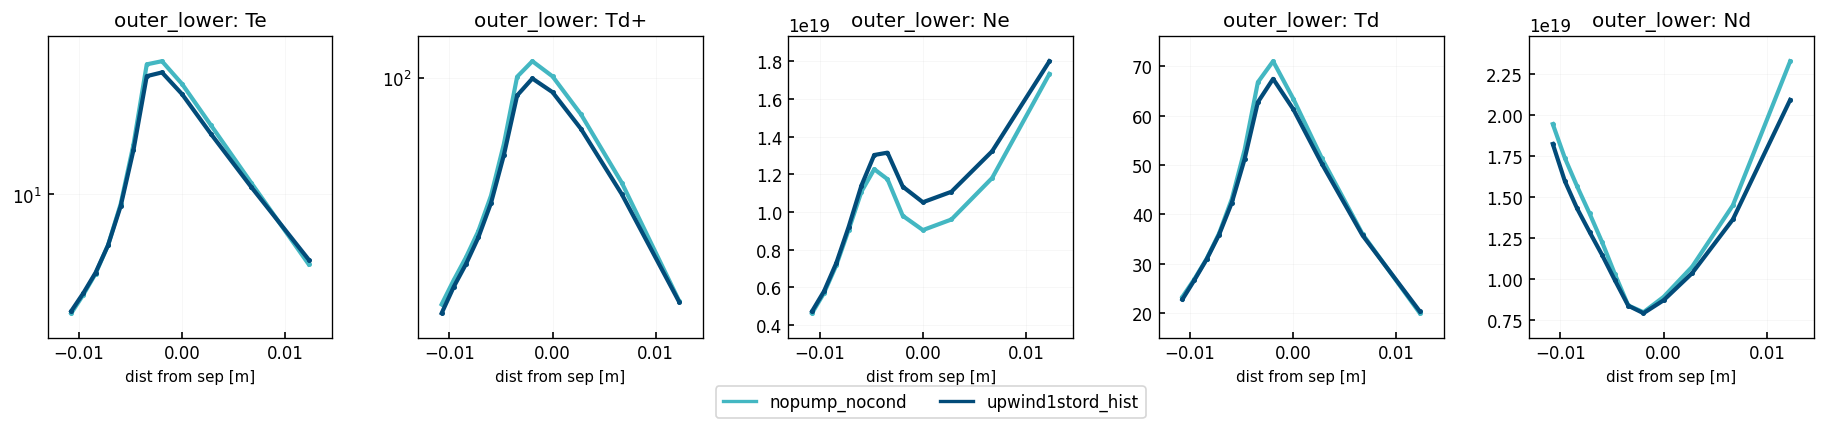

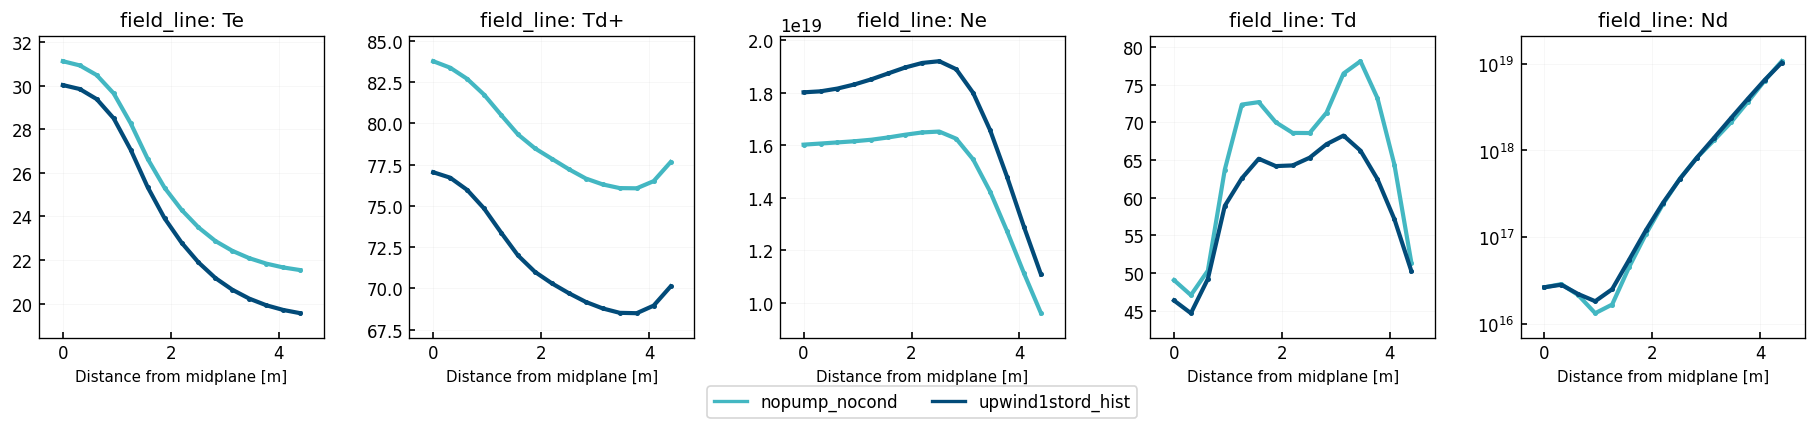

In [9]:
toplot = {}
for case in cs:
    toplot[case] = cs[case].ds.isel(t=-1, x = slice(2,-2))
    
lineplot(
    toplot,
    clean_guards = False,
    logscale = True,
    params = ["Te", "Td+", "Ne", "Td", "Nd"],
    regions = ["omp", "outer_lower", "field_line"],
)

# COnvergence

In [13]:
cs.keys()

dict_keys(['newalldisabled_flushnn'])

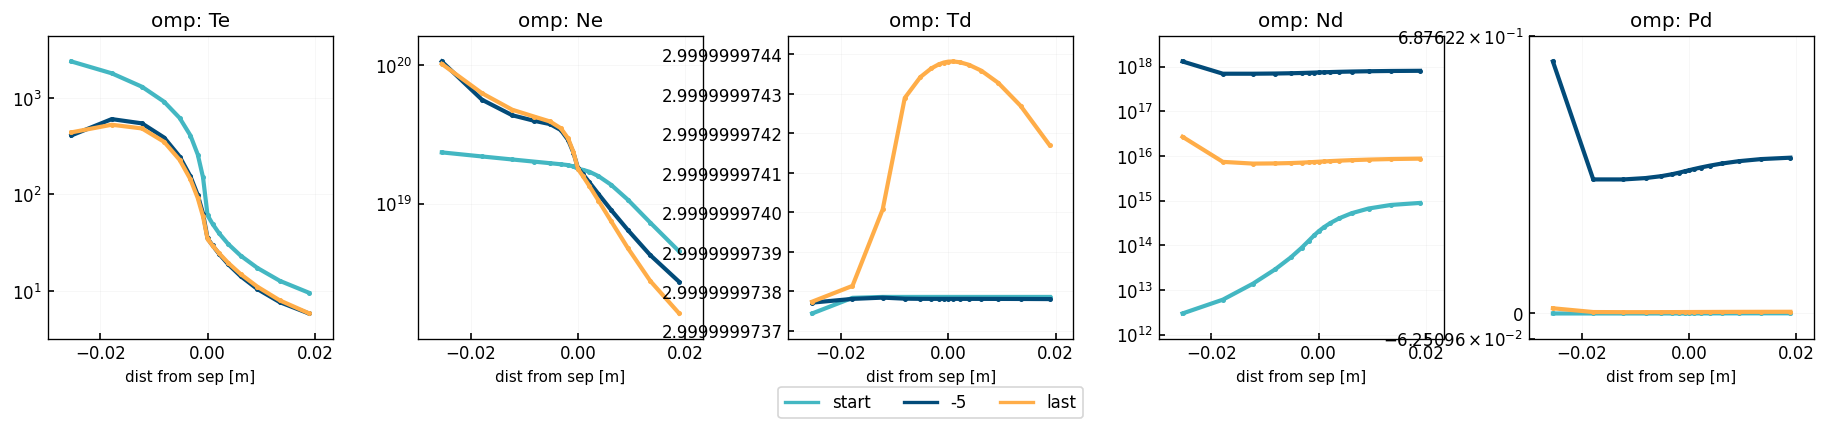

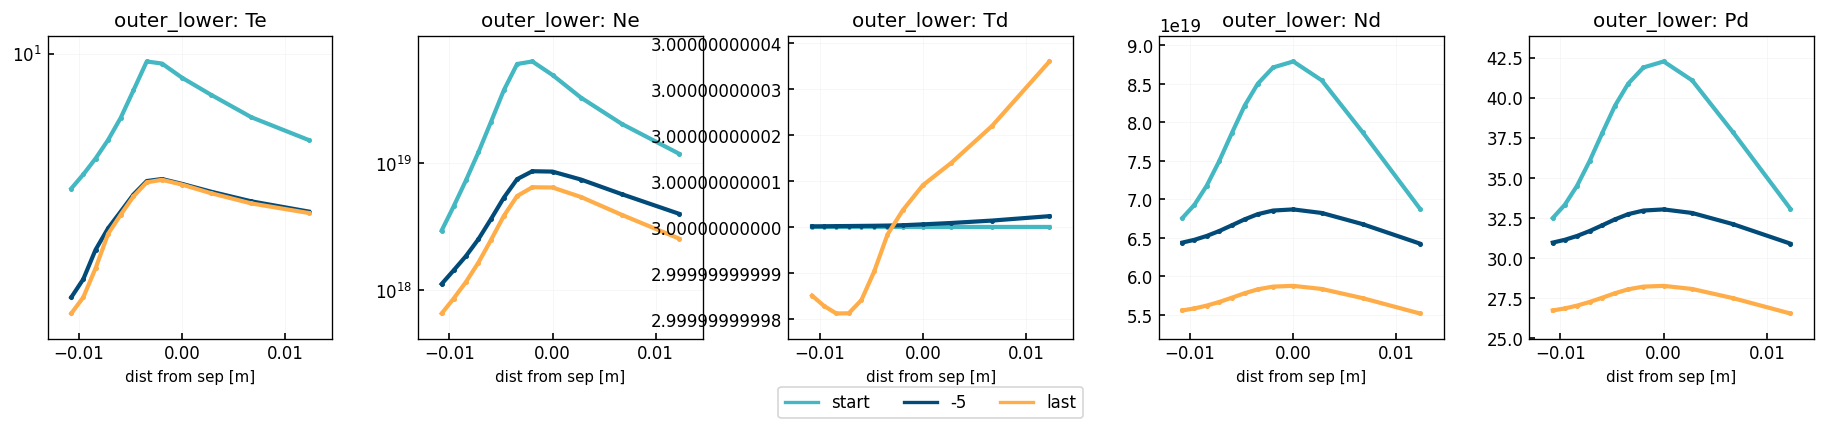

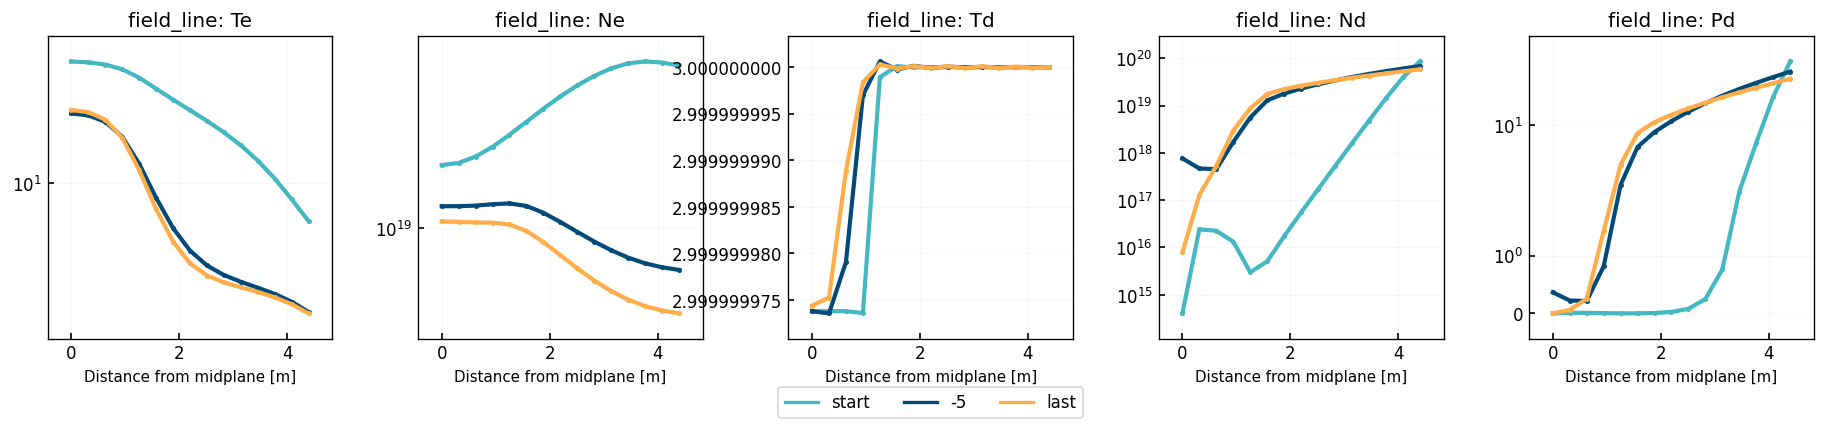

In [15]:
case = "newalldisabled_flushnn"
lineplot(
    {
        "start":cs[case].ds.isel(t=0, x = slice(2,-2)),
        "-5":cs[case].ds.isel(t=-3, x = slice(2,-2)),
        "last":cs[case].ds.isel(t=-1, x = slice(2,-2)),
        # "base":cs["base"].ds.isel(t=-1, x = slice(2,-2)),

    },
    clean_guards = False,
    params = ["Te", "Ne", "Td", "Nd", "Pd"],
    regions = ["omp", "outer_lower", "field_line"],
)

In [28]:
y_omp

40

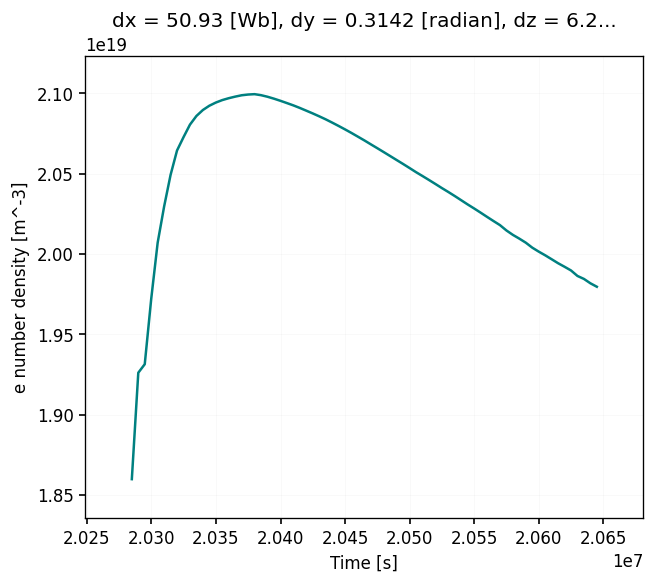

In [4]:
ds = cs["afn"].ds
m = ds.metadata

j2_2g = m["jyseps2_2"] + m["MYG"] * 3
j1_2g = m["jyseps1_2"] + m["MYG"] * 3
y_omp = int((j2_2g - j1_2g) / 2) + j1_2g
x_sep = m["ixseps1"]

x_sep

ds["Ne"].isel(x = x_sep, theta = y_omp).plot()

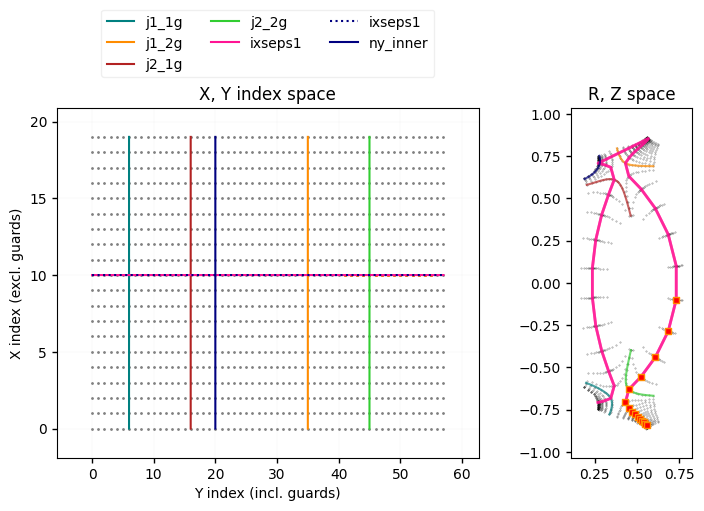

In [15]:
ds = cs["test"].ds.isel(t=-1)
m = ds.metadata

fl = ds.isel(x = m["ixseps1"], theta = slice(41,-2))
plot_selection(ds, fl)

(0.15, 0.75)

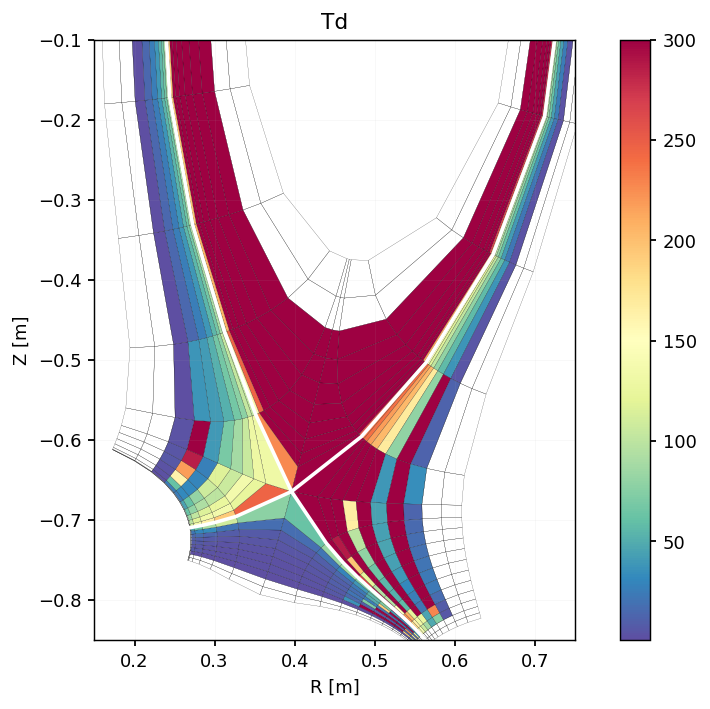

In [9]:

fig, ax = plt.subplots(figsize = (9,6), dpi = 130)
ds = cs["base_nocond"].ds.isel(t=-1)
(ds["Td"]).hermesm.clean_guards().bout.polygon(ax, cmap = "Spectral_r", vmax = 300, vmin = None, antialias = True, linewidth = 0.1, logscale = False)
ax.set_ylim(-0.85, -0.1)
ax.set_xlim(0.15,0.75)


In [14]:
cs.keys()

dict_keys(['neumanncore'])

In [22]:
cs.keys()

dict_keys(['noneutbc'])

(0.15, 0.75)

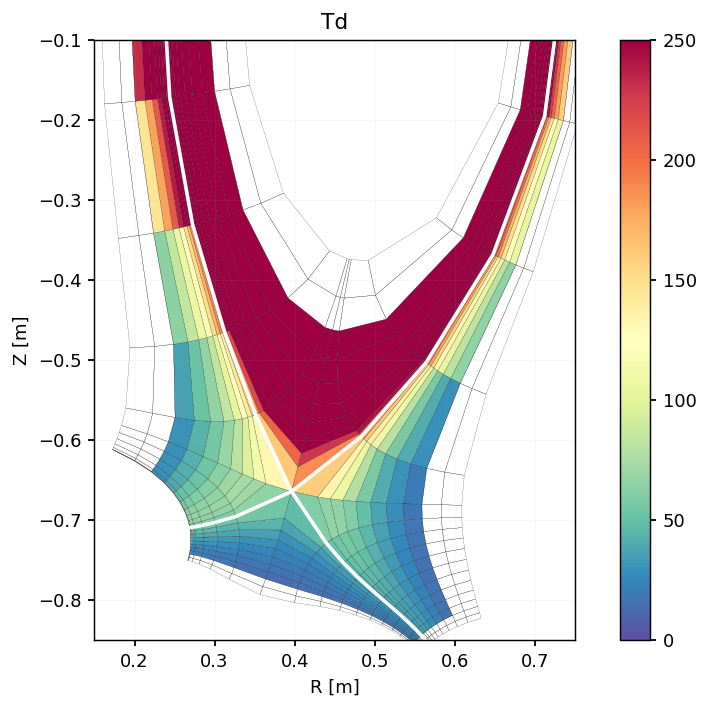

In [5]:

fig, ax = plt.subplots(figsize = (9,6), dpi = 130)
ds = cs["test"].ds.isel(t=-1)
ds["Td"].hermesm.clean_guards().bout.polygon(ax, cmap = "Spectral_r", vmax = 250, vmin = 0, antialias = True, linewidth = 0.1)
ax.set_ylim(-0.85, -0.1)
ax.set_xlim(0.15,0.75)
